In [76]:
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm #그래프 출력시
import matplotlib as mpl #그래프 옵션
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import graphviz
import os
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from sklearn import metrics

import matplotlib.pyplot as plt #그래프 출력시
import matplotlib as mpl #그래프 옵션

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프의 음수값이 나올때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus=False)

#그래프 시각화 옵션
%matplotlib inline
#그래프 한글 설정
mpl.rc('font',family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False

#글씨를 선명하게
set_matplotlib_formats

#음수처리
mpl.rc('axes', unicode_minus=False)

In [77]:
ds = pd.read_csv('total.csv')
ds.info()

#csv로 읽을 시 엔진=파이썬 제거해야 칼럼 1로 안 읽음
#tr은 결측치 없이 모든 열이 10000개의 관측치 존재
#us는 결측치가 있는 열이 많음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9758 entries, 0 to 9757
Data columns (total 27 columns):
회원코드              9758 non-null object
연령                9758 non-null int64
신장                9758 non-null float64
회원초기체중            9758 non-null float64
최저체중              5698 non-null float64
목표체중              9758 non-null int64
당뇨여부(설문)          9758 non-null object
음주여부(설문)          9758 non-null object
일주일운동횟수(설문)       9758 non-null object
건강보조식품복용여부(설문)    9758 non-null object
agegroup          9758 non-null object
체중감소량             5695 non-null float64
목표체중감소량           9758 non-null float64
BMI               9758 non-null float64
성별                9758 non-null int64
상태                9758 non-null object
프로그램가격            9758 non-null int64
최종결제금액            9758 non-null int64
채널                9758 non-null object
보조식품가격            9758 non-null int64
보조식품(추가구매)        9758 non-null object
time              9758 non-null object
month             9758 non-null int

In [4]:
ds.isnull().sum()

회원코드                 0
연령                   0
신장                   0
회원초기체중               0
최저체중              4060
목표체중                 0
당뇨여부(설문)             0
음주여부(설문)             0
일주일운동횟수(설문)          0
건강보조식품복용여부(설문)       0
agegroup             0
체중감소량             4063
목표체중감소량              0
BMI                  0
성별                   0
상태                   0
프로그램가격               0
최종결제금액               0
채널                   0
보조식품가격               0
보조식품(추가구매)           0
time                 0
month                0
day                  0
hour                 0
결제                   0
프로그램                 0
dtype: int64

In [5]:
#나이대를 가져오는 함수(많은 비율을 차지하는 20대는 초반과 후반 구분)
def ages_10(row):
    if row>=20 and row<25 :
        return '20대 초반'
    if row>=25 and row<30 :
        return '20대 후반'
    if row>=50:
        return '50대 이상'
    return str(int(row/10)*10)+'대'

In [6]:
ds['나이대']=ds['연령'].apply(ages_10)

In [7]:
ds['나이대'].head()

0    20대 후반
1    20대 후반
2    20대 초반
3    20대 초반
4    20대 후반
Name: 나이대, dtype: object

In [8]:
ds['days']=ds['day'].replace('Sunday',0).replace('Monday',1).replace('Tuesday',2).replace('Wednesday',3).replace('Thursday',4).replace('Friday',5).replace('Saturday',6)

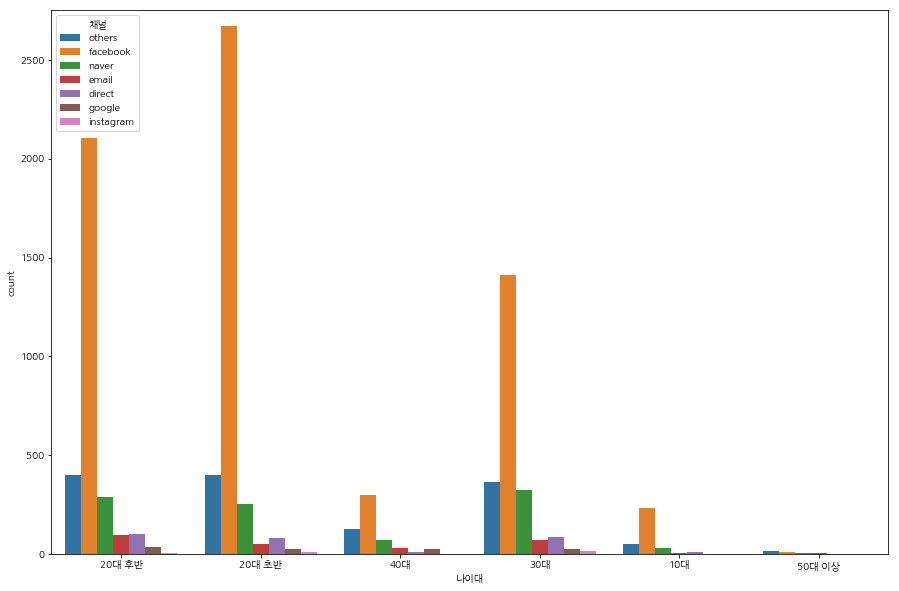

In [14]:
plt.figure(figsize=[15,10])
plt.ylim(0,2750)
sns.countplot(data=ds, x='나이대', hue='채널')
#20대의 facebook 채널이 압도적
#others가 다음 높으나 비즈니스적 해석이 어려움 - 홍보채널 세분과 관리 필요
#naver가 그 다음으로 높음, 20대 후반부터 naver 비중이 증가함
#30대는 naver cafe, 맘카페 이용률이 높은것으로 추정 -> 
#20대후반~30대는 email이 높은 경향

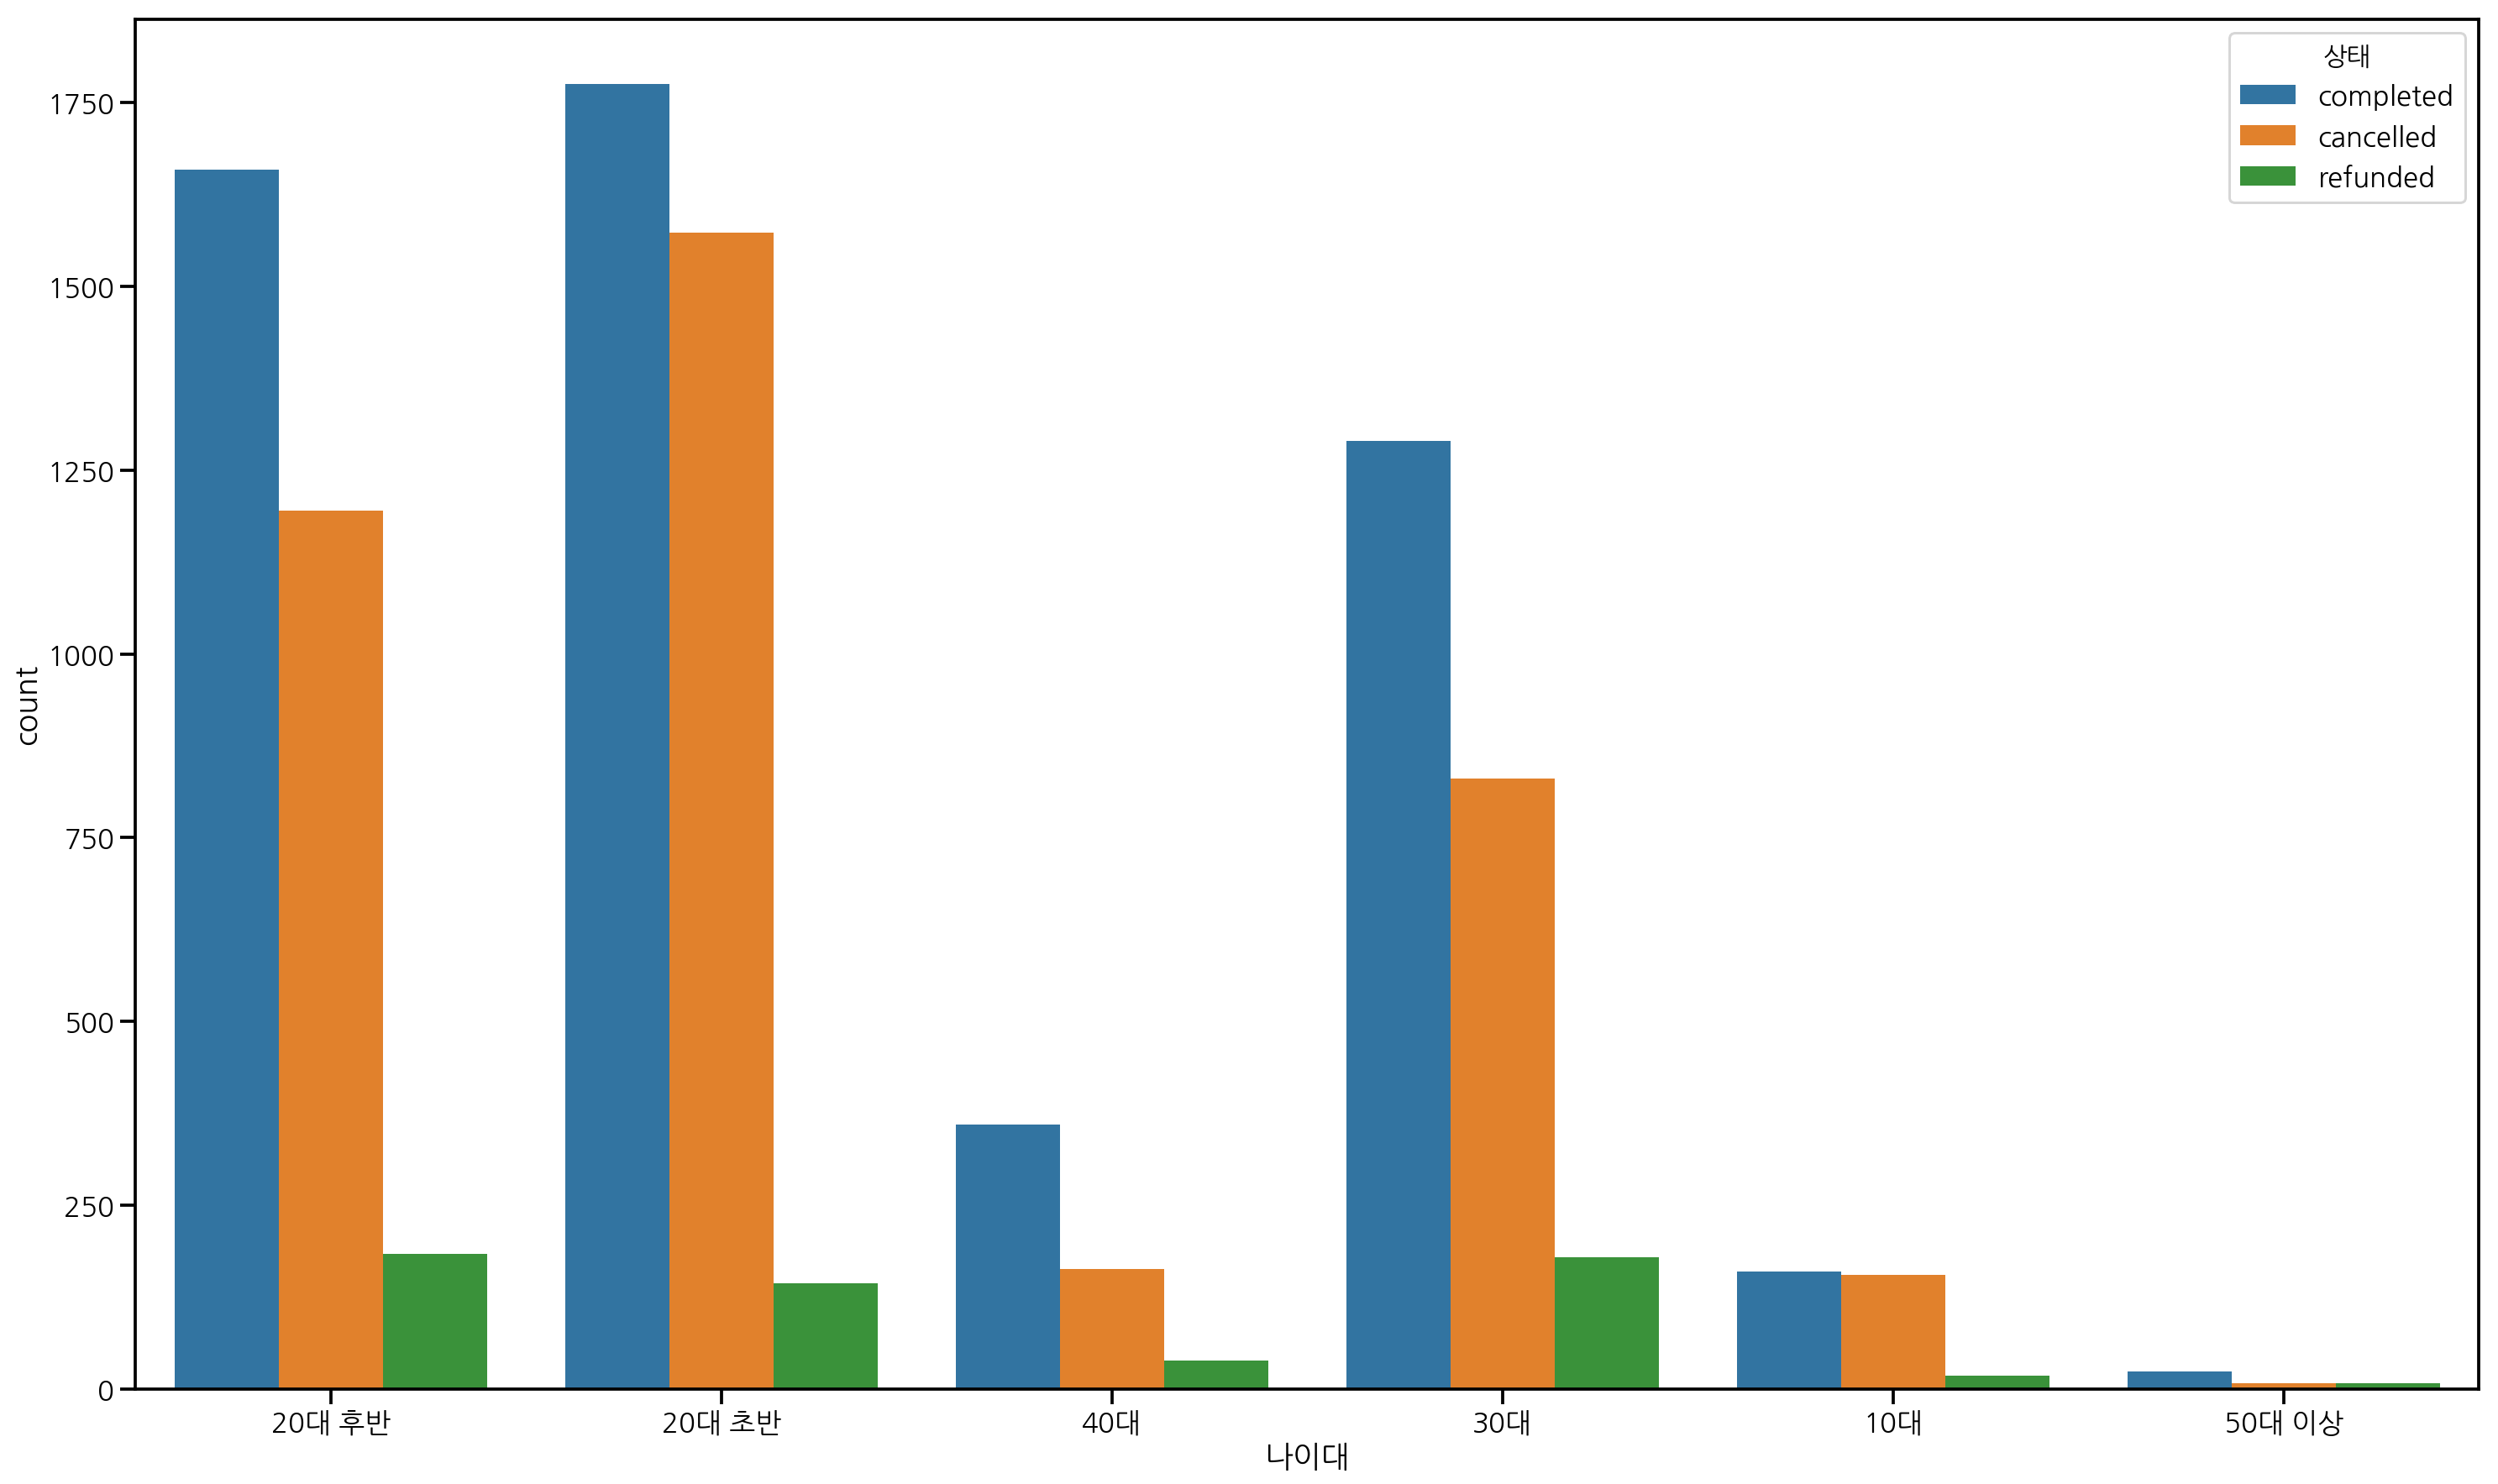

In [706]:
plt.figure(figsize=[25,15])
sns.countplot(data=ds, x='나이대', hue='상태')
#50대 이상, 10대는 매우 적은 data
#20대 30대가 주 분석대상
#20대 초반의 캔슬비중이 상당히 높음
#20대 후반~ 30대 ~40대 갈수록 캔슬률이 낮아지지만 동시에 환불률은 올라감


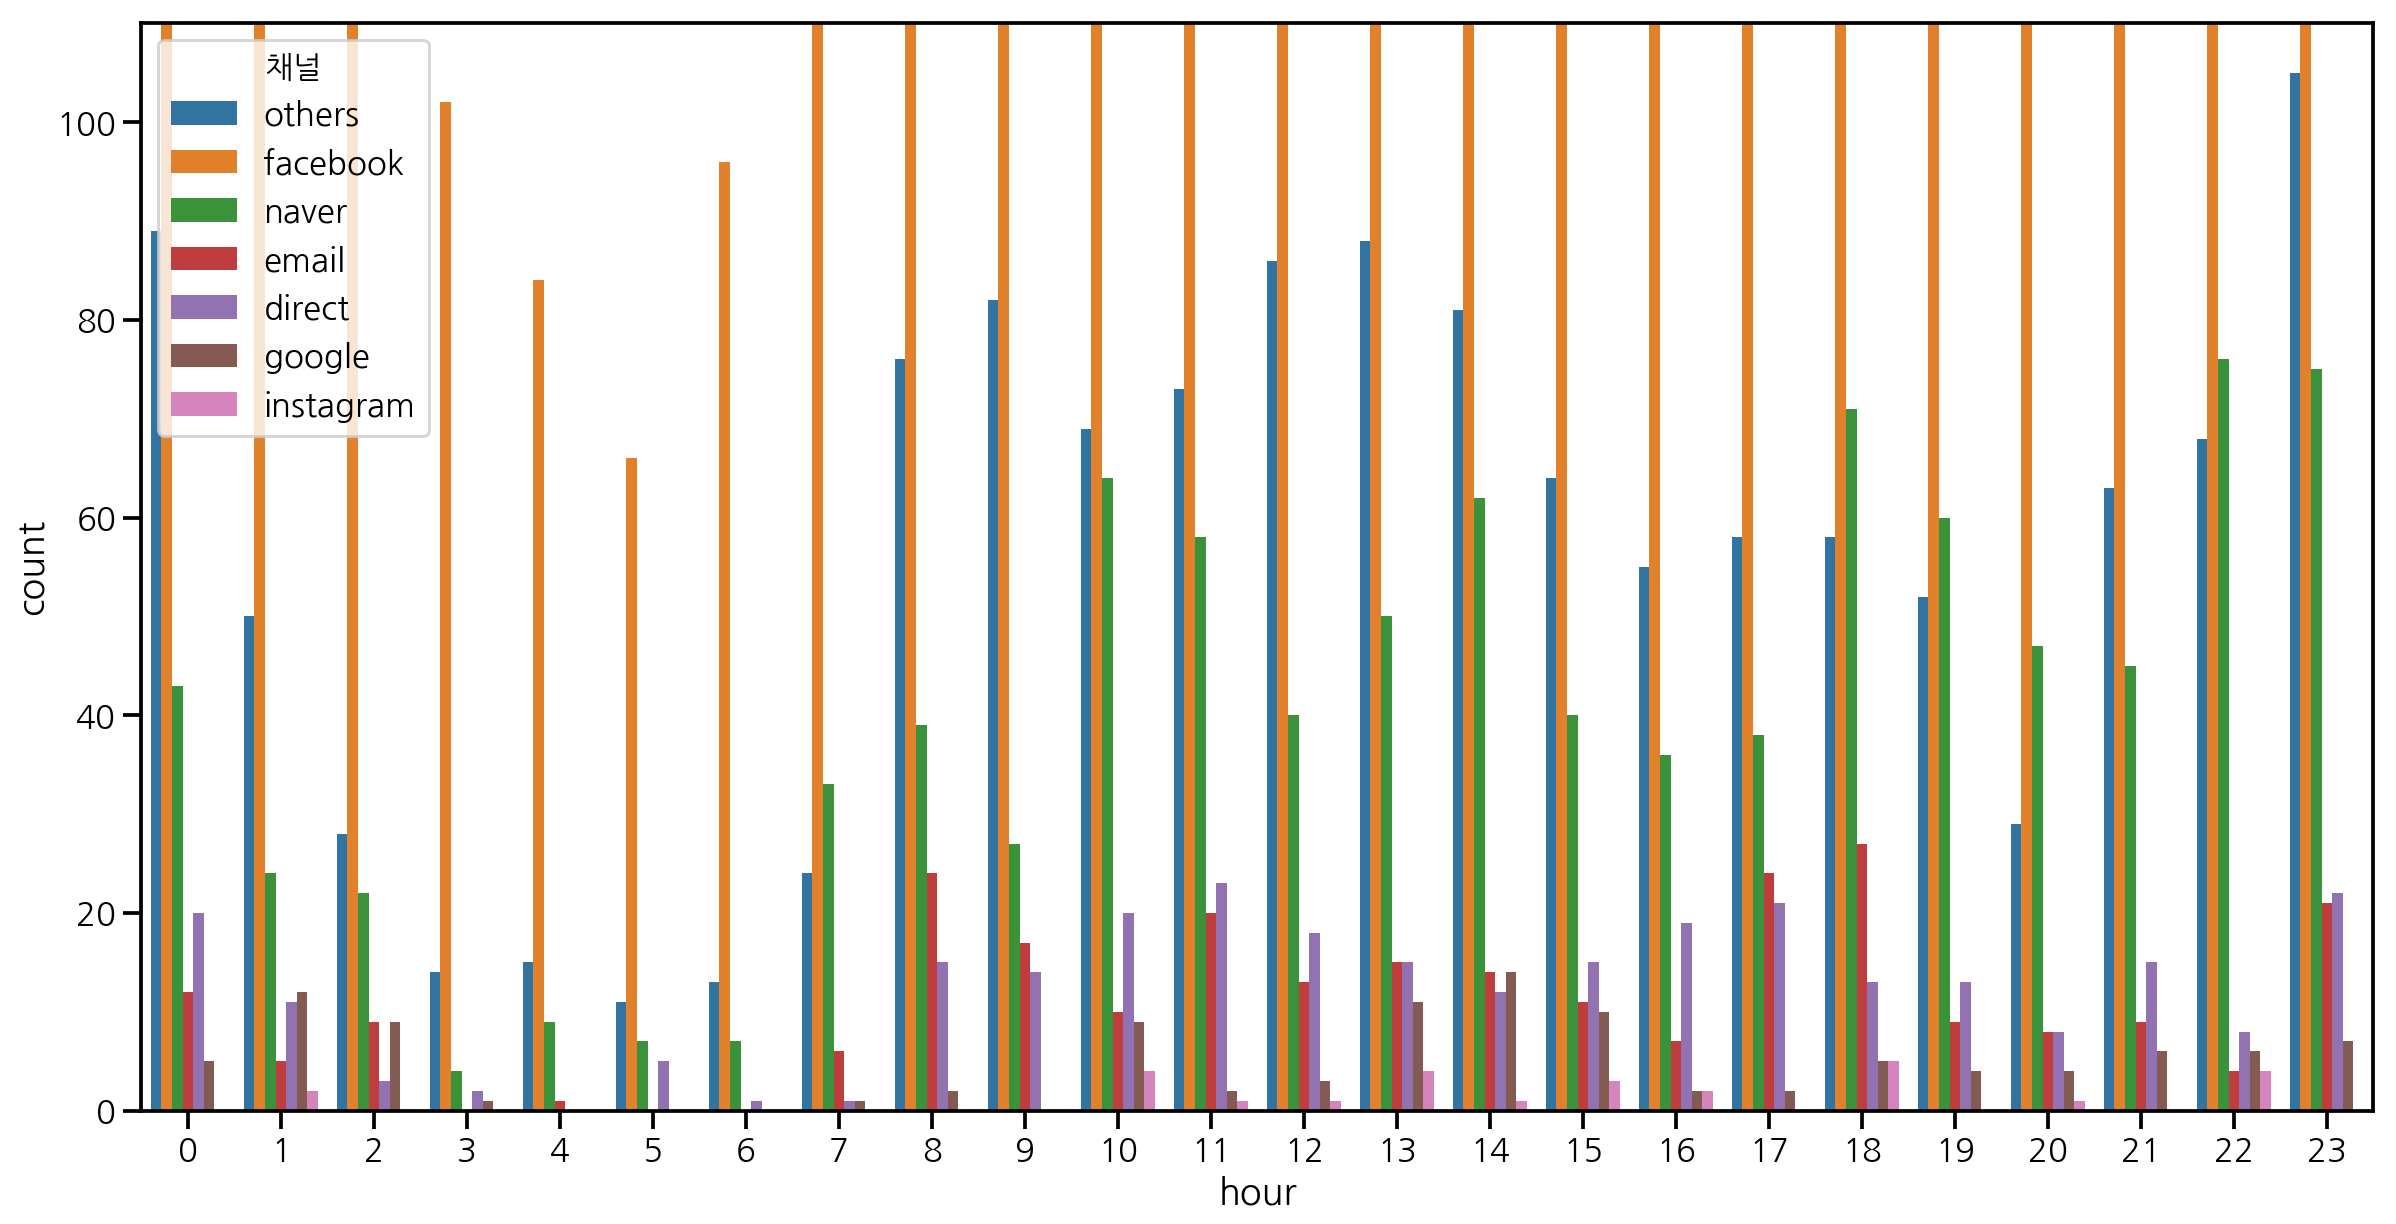

In [643]:
plt.figure(figsize=[20,10])
plt.ylim(0,110)
sns.countplot(data=ds, x='hour', hue='채널')
#23시에 others가 높음
#naver는 10시, 14시 나른한 시간대에 높음 -> 30대 아줌마들 
#18시 22시,23시 는 퇴근후, 집에서 쉬면서


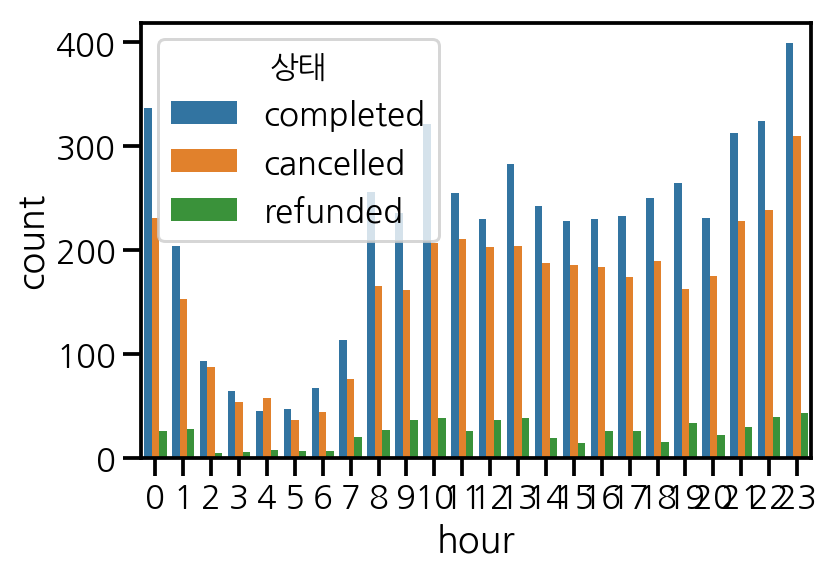

In [644]:
sns.countplot(data=ds, x='hour', hue='상태')
#4시는 캔슬이 컴플릿보다 높음
#대체로 오전 10시, 13시, 21~0시에 많은 경향

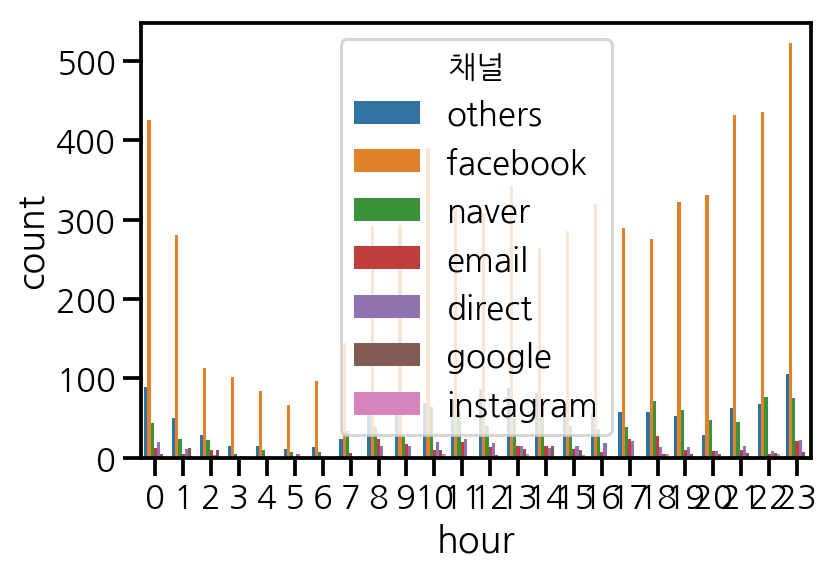

In [645]:
sns.countplot(data=ds, x='hour', hue='채널')
#채널의 대부분이 facebook이며 23시에 가장 높음
#8시부터 naver유입량이 유의미해지며, 0시까지 비교적 균일함


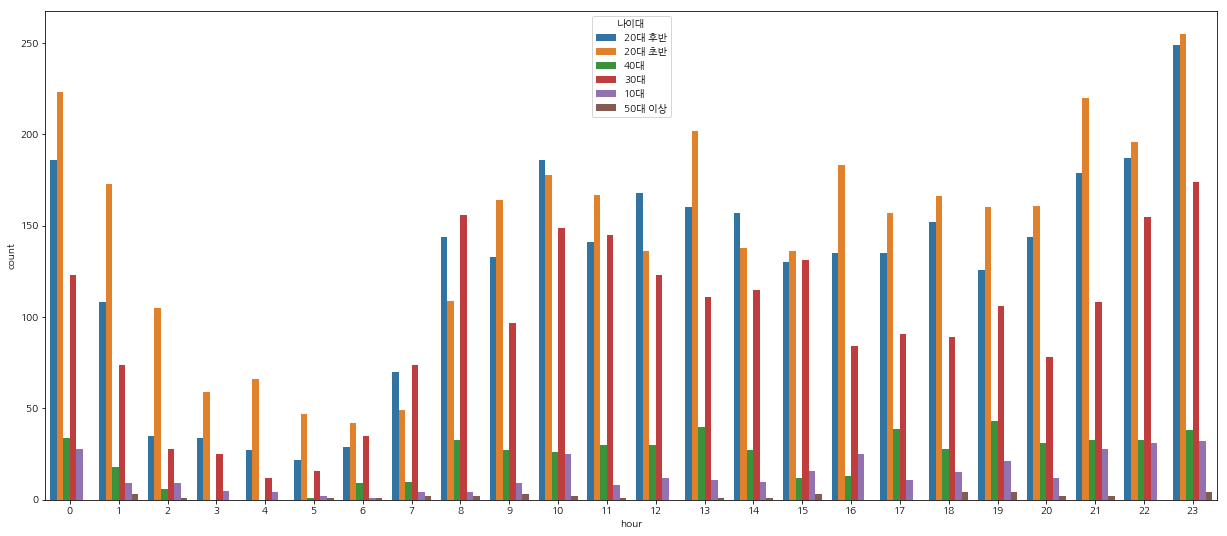

In [16]:
plt.figure(figsize=[21,9])
sns.countplot(data=ds, x='hour', hue='나이대')
#30대는 8시에 유입이 많음
#23시에는 모두 유입이 많고 20대 초반 후반 모두 높음, 특히 20대가 급증
#20시에는 30대가 적고, 20대가 높음
#15시에는 20대초후반, 30대 모두가 비슷


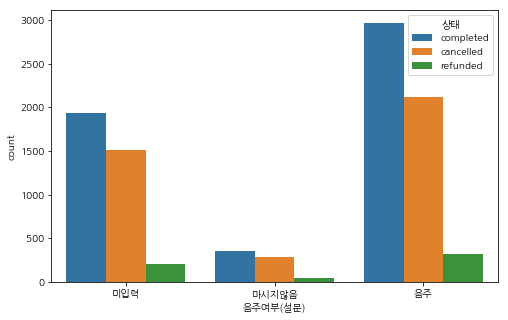

In [19]:
plt.figure(figsize=[8,5])
sns.countplot(data=ds, x='음주여부(설문)', hue='상태')
#마시지않음의 캔슬률이 높음
#음주의 캔슬률이 상대적으로 낮음 - 절실하다고 해석?
#미입력은 중간 특성

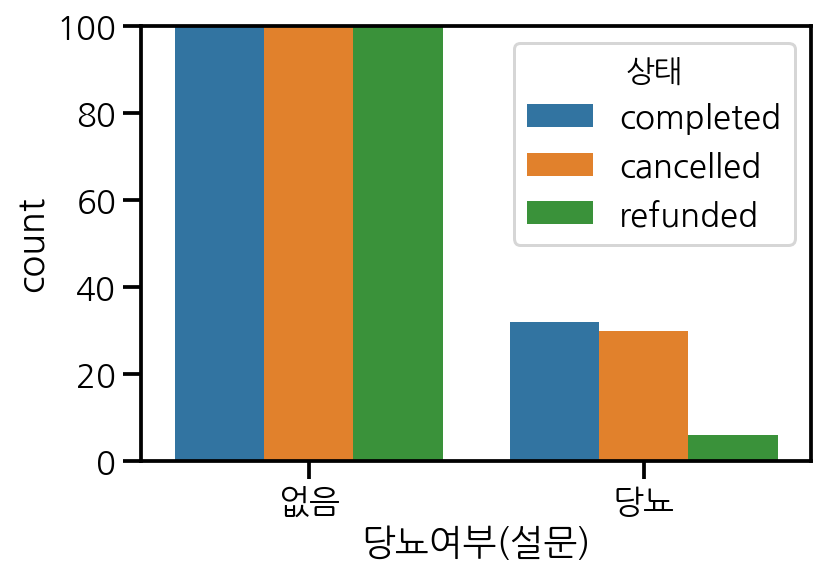

In [648]:
plt.ylim(0,100)
sns.countplot(data=ds, x='당뇨여부(설문)', hue='상태')
#당뇨의 경우 cancelled 확률이 높으나, data수가 적어서 속단 X

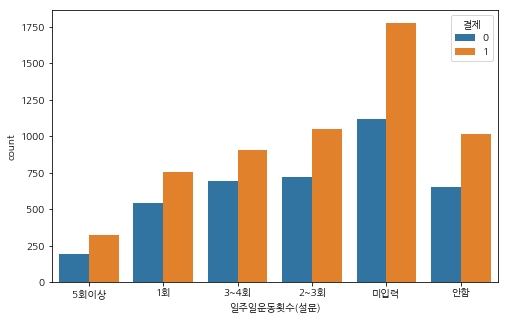

In [20]:
plt.figure(figsize=[8,5])
sns.countplot(data=ds, x='일주일운동횟수(설문)', hue='결제')
#3~4회, 1회의 can확률 높음
#미입력, 안함의 can확률 낮음
#2~3회는 사이값 
#5회이상은?

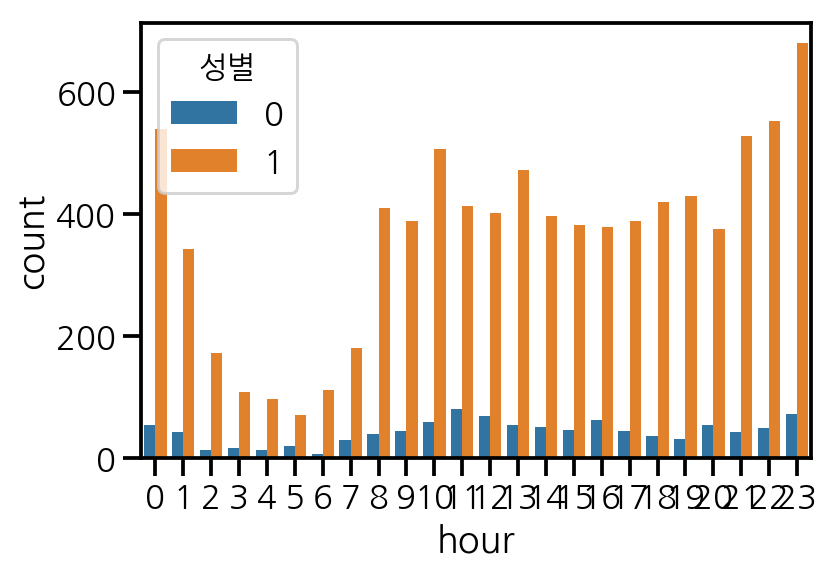

In [650]:
sns.countplot(data=ds, x='hour', hue='성별')

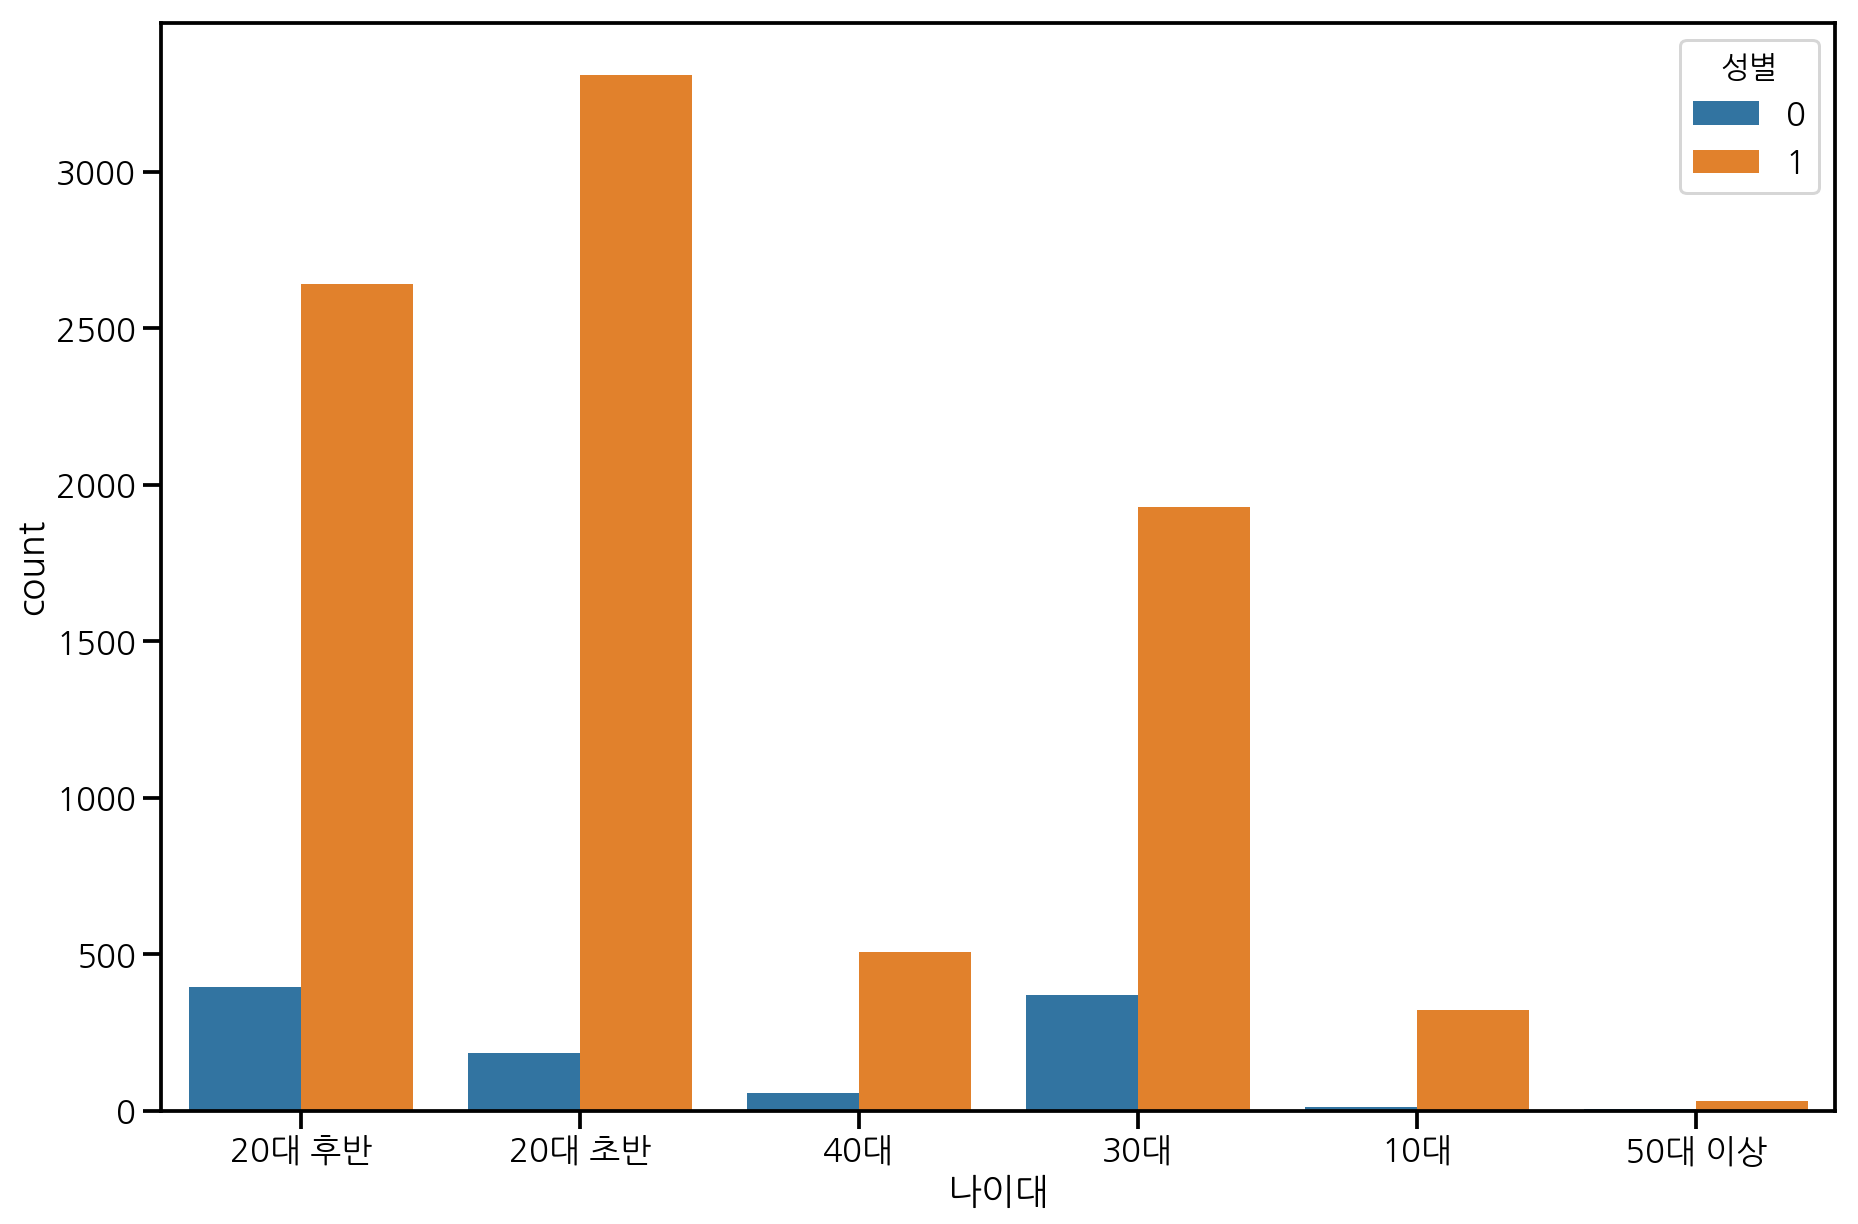

In [708]:
plt.figure(figsize=[15,10])
sns.countplot(data=ds, x='나이대', hue='성별')

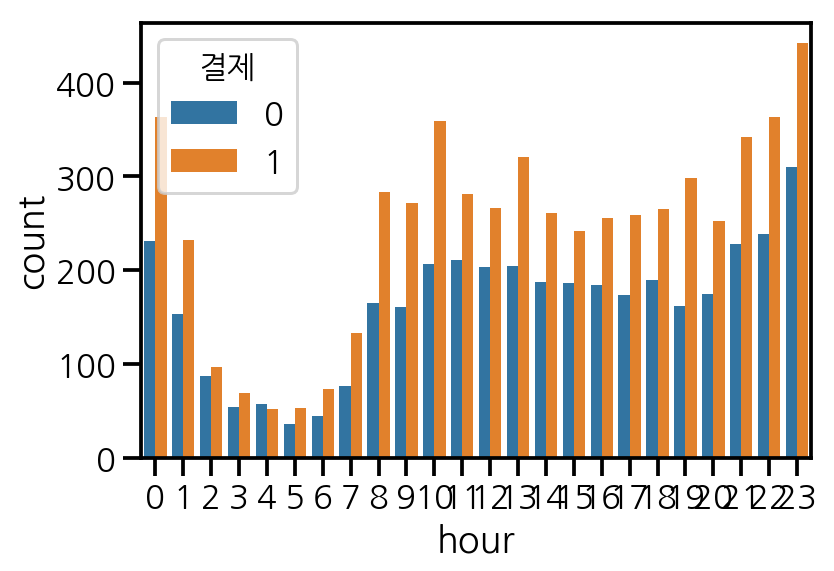

In [652]:
sns.countplot(data=ds, x='hour', hue='결제')
#결제1이 리펀드랑 컴플리티드
#결제0이 캔슬드

#10시, 13시에 캔슬률이 낮다
#19시에 캔슬률이 낮다

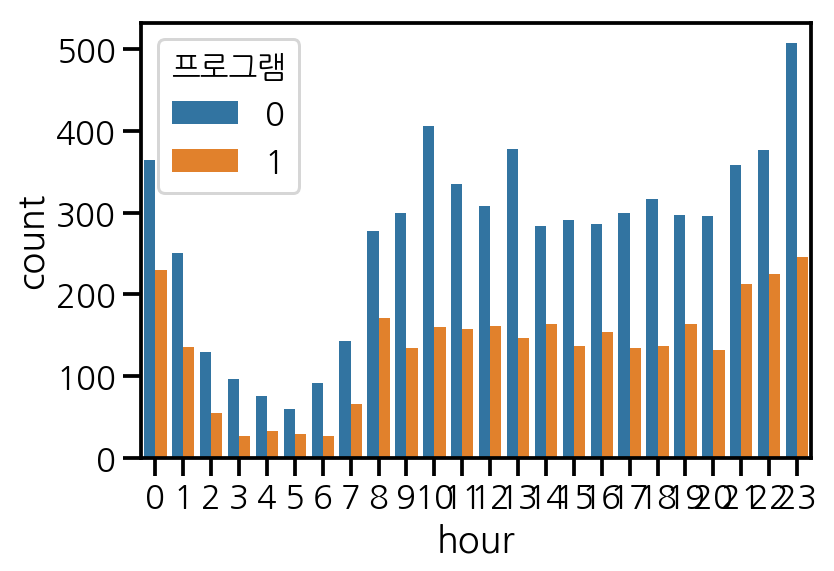

In [653]:
sns.countplot(data=ds, x='hour', hue='프로그램')
#프로그램은 a가 0, b가 1
#a가 23시에 높음
#b는 

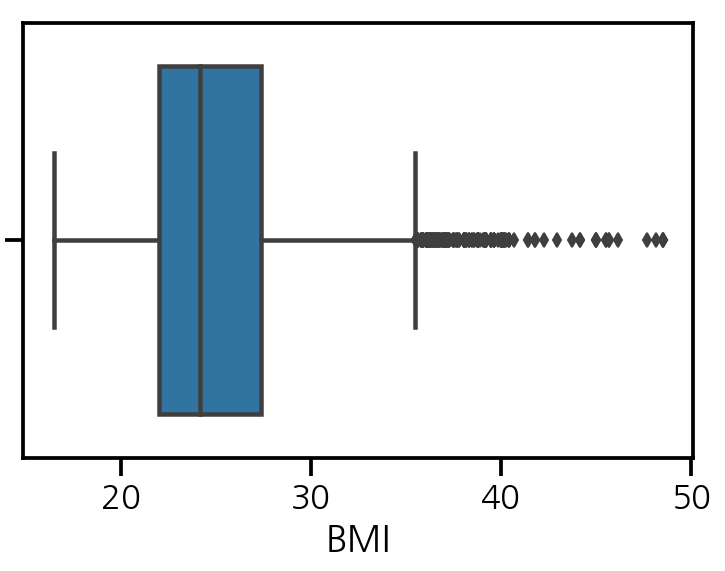

In [709]:
sns.boxplot(data=ds, x='BMI', hue='상태')

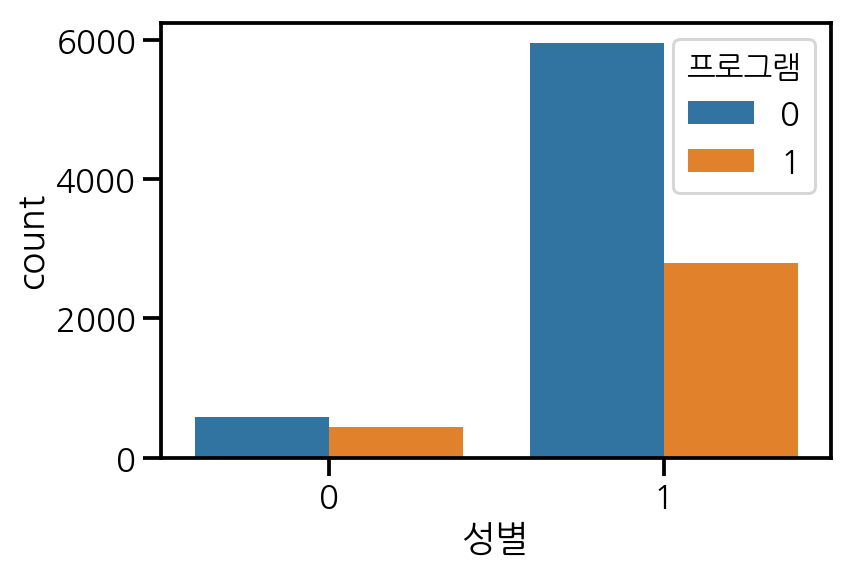

In [655]:
sns.countplot(data=ds, x='성별', hue='프로그램')
#남자가 프로그램1 = b를 더 구매할 확률이 높음


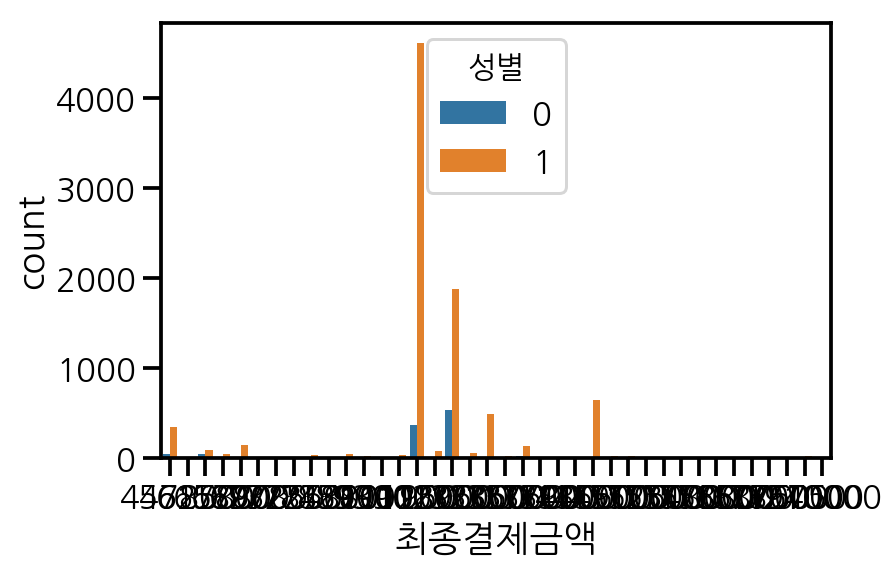

In [656]:
sns.countplot(data=ds, x='최종결제금액', hue='성별')
#남자의 평균금액이 높음

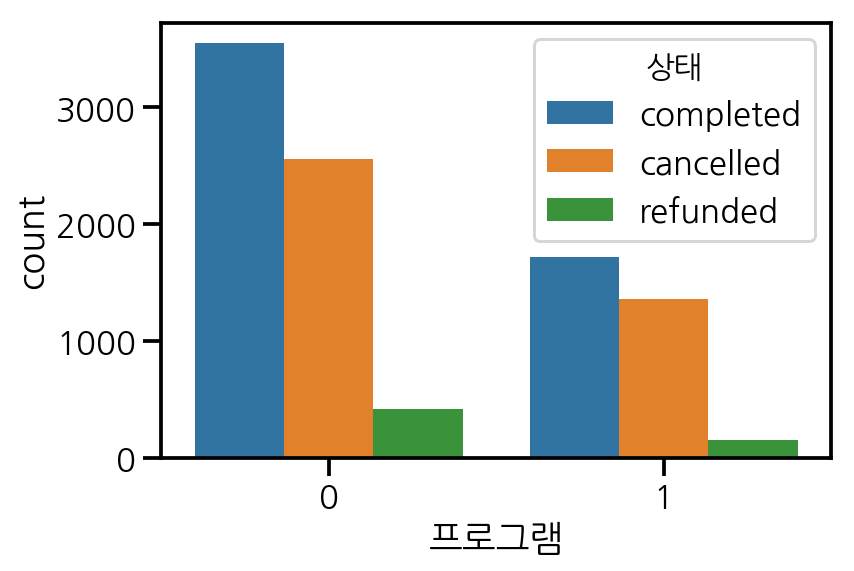

In [657]:
sns.countplot(data=ds, x='프로그램', hue='상태')
#프로그램1 b의 캔슬률이 더 높음

In [658]:
ds[['최종결제금액','성별','프로그램','프로그램가격','보조식품가격','보조식품(추가구매)','상태']]

,최종결제금액,성별,프로그램,프로그램가격,보조식품가격,보조식품(추가구매),상태
0,112500,1,1,112500,0,구매안함,completed
1,44780,0,1,44780,0,구매안함,completed
2,149000,1,0,132000,17000,식이요법보조제A,completed
3,112500,1,0,112500,0,구매안함,completed
4,44780,1,1,44780,0,구매안함,completed
5,112500,1,0,112500,0,구매안함,cancelled
6,112500,1,1,112500,0,구매안함,cancelled
7,44780,1,1,44780,0,구매안함,completed
8,129500,1,0,112500,17000,식이요법보조제A,completed
9,112500,1,0,112500,0,구매안함,completed


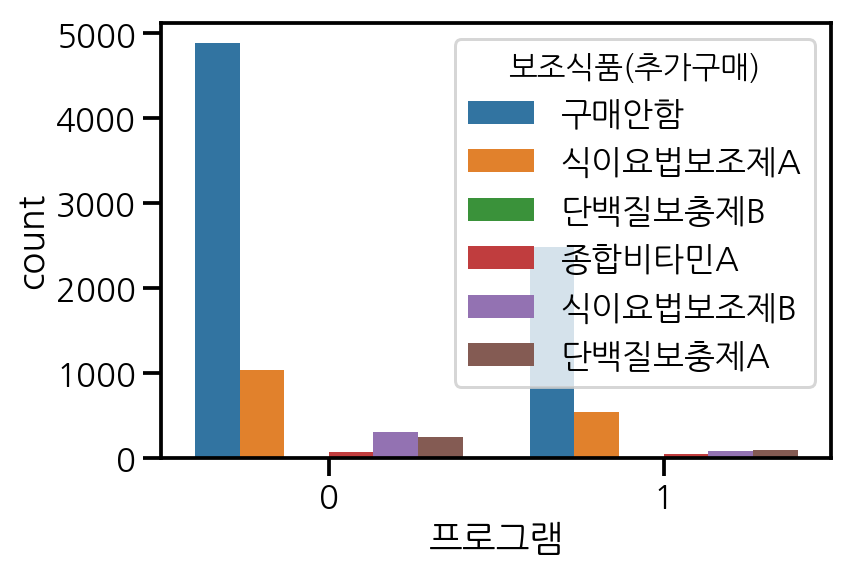

In [659]:
sns.countplot(data=ds, x='프로그램', hue='보조식품(추가구매)')
#프로그램1 b의 식이요법보조제A 구매율이 상대적으로 더 높음

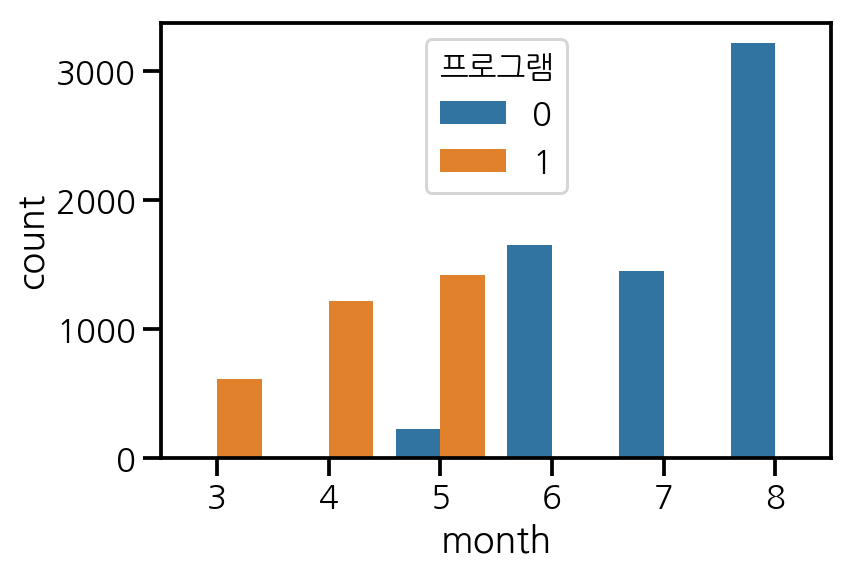

In [660]:
sns.countplot(data=ds, x='month', hue='프로그램')

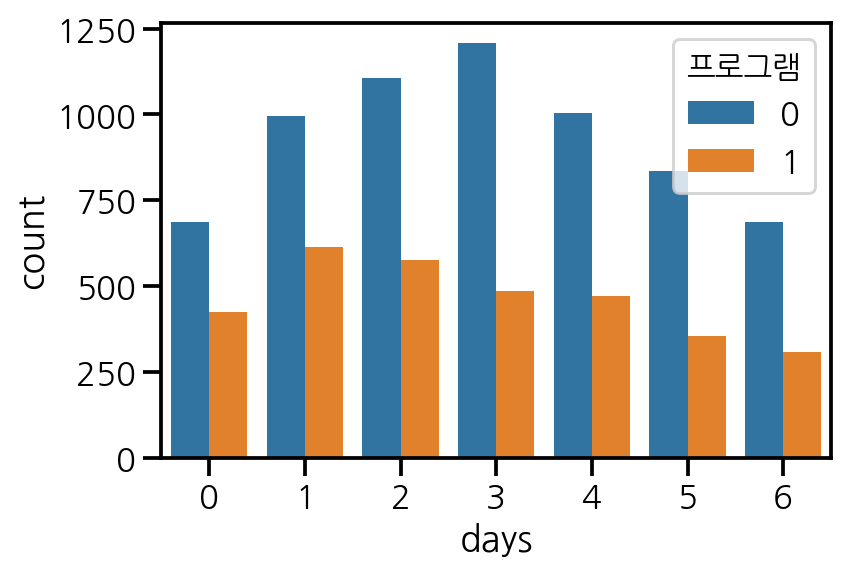

In [661]:
sns.countplot(data=ds, x='days', hue='프로그램')
#일월화수목금토
#0 A는 수요일 고점을 기준으로 정규분포
#1 B는 월요일 고점을 기준으로 정규분포와 비슷

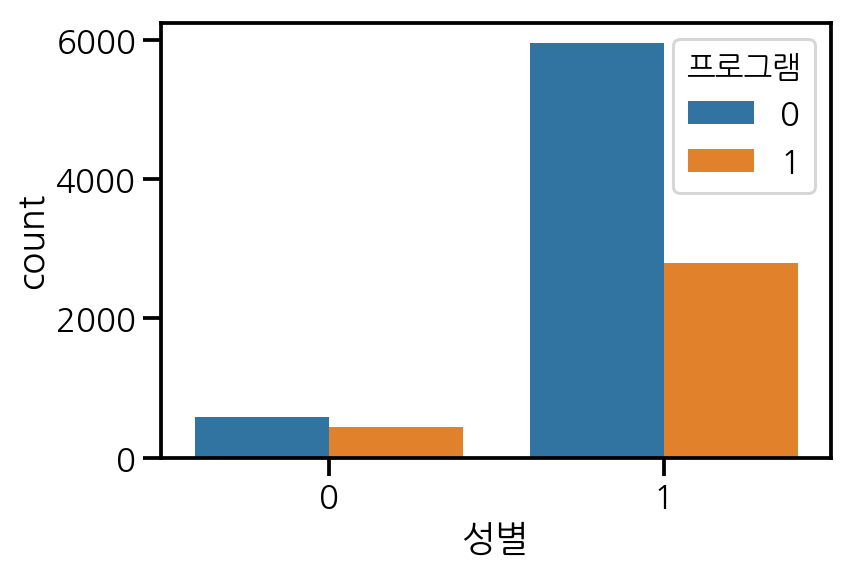

In [662]:
sns.countplot(data=ds, x='성별', hue='프로그램')

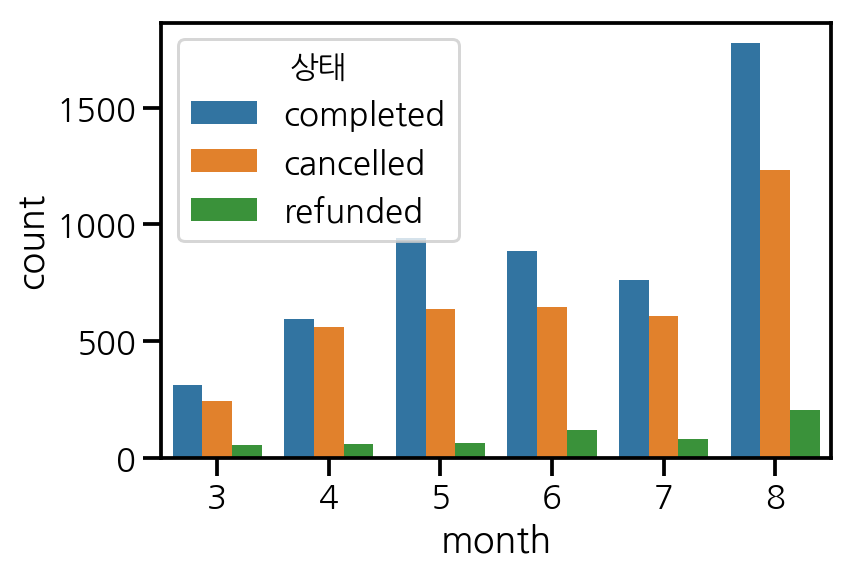

In [663]:
sns.countplot(data=ds, x='month', hue='상태')


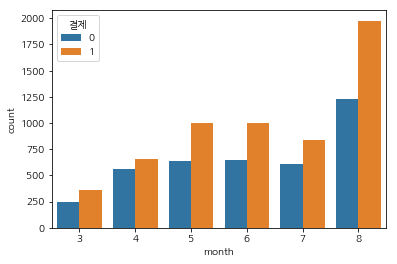

In [26]:
sns.countplot(data=ds, x='month', hue='결제')

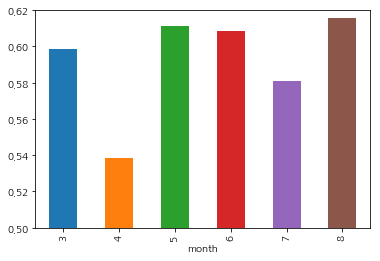

In [53]:
#sns.countplot(data=ds, x='month', hue='결제')
#4월, 7월의 취소율이 높음
#8월은 비교적 낮음
#비율 어떻게 계산?
table1= pd.pivot_table(ds,index=['month'],columns='결제',aggfunc='count')
table2=pd.DataFrame()
table2['취소']= table1['BMI'][0]
table2['결제']= table1['BMI'][1]
table2['total'] = table1['BMI'][0]+table1['BMI'][1]
table2['rate'] = table2['결제']/table2['total']
plt.ylim([0.5,0.62])
table2['rate'].plot(kind='bar')

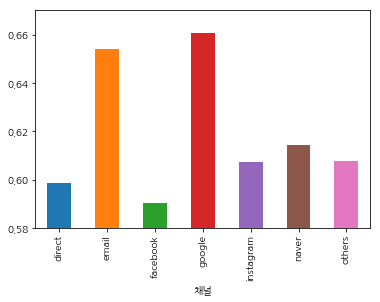

In [59]:
table1= pd.pivot_table(ds,index=['채널'],columns='결제',aggfunc='count')
table2=pd.DataFrame()
table2['취소']= table1['BMI'][0]
table2['결제']= table1['BMI'][1]
table2['total'] = table1['BMI'][0]+table1['BMI'][1]
table2['rate'] = table2['결제']/table2['total']
plt.ylim([0.58,0.67])
table2['rate'].plot(kind='bar')

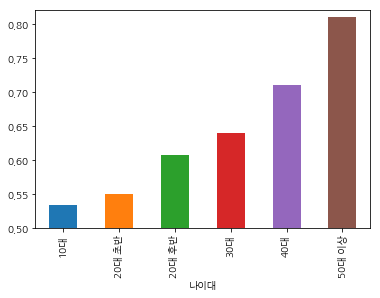

In [75]:
table1= pd.pivot_table(ds,index=['나이대'],columns='결제',aggfunc='count')
table2=pd.DataFrame()
table2['취소']= table1['BMI'][0]
table2['결제']= table1['BMI'][1]
table2['total'] = table1['BMI'][0]+table1['BMI'][1]
table2['rate'] = table2['결제']/table2['total']
plt.ylim([0.5,0.82])
table2['rate'].plot(kind='bar')

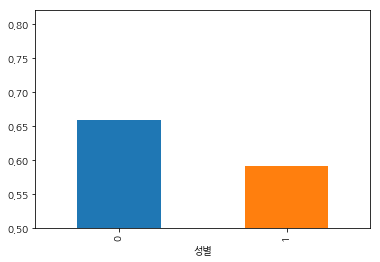

In [65]:
table1= pd.pivot_table(ds,index=['성별'],columns='결제',aggfunc='count')
table2=pd.DataFrame()
table2['취소']= table1['BMI'][0]
table2['결제']= table1['BMI'][1]
table2['total'] = table1['BMI'][0]+table1['BMI'][1]
table2['rate'] = table2['결제']/table2['total']
plt.ylim([0.5,0.82])
table2['rate'].plot(kind='bar')

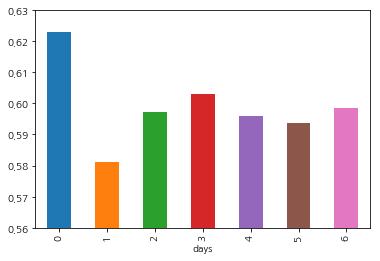

In [73]:
table1= pd.pivot_table(ds,index=['days'],columns='결제',aggfunc='count')
table2=pd.DataFrame()
table2['취소']= table1['BMI'][0]
table2['결제']= table1['BMI'][1]
table2['total'] = table1['BMI'][0]+table1['BMI'][1]
table2['rate'] = table2['결제']/table2['total']
plt.ylim([0.56,0.63])
table2['rate'].plot(kind='bar')

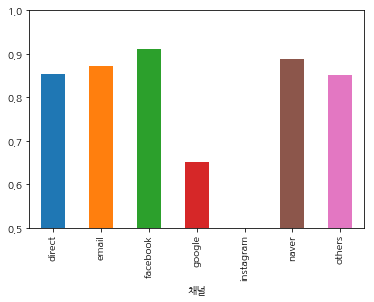

In [68]:
table1= pd.pivot_table(ds,index=['채널'],columns='성별',aggfunc='count')
table2=pd.DataFrame()
table2['취소']= table1['BMI'][0]
table2['결제']= table1['BMI'][1]
table2['total'] = table1['BMI'][0]+table1['BMI'][1]
table2['rate'] = table2['결제']/table2['total']
plt.ylim([0.5,1])
table2['rate'].plot(kind='bar')

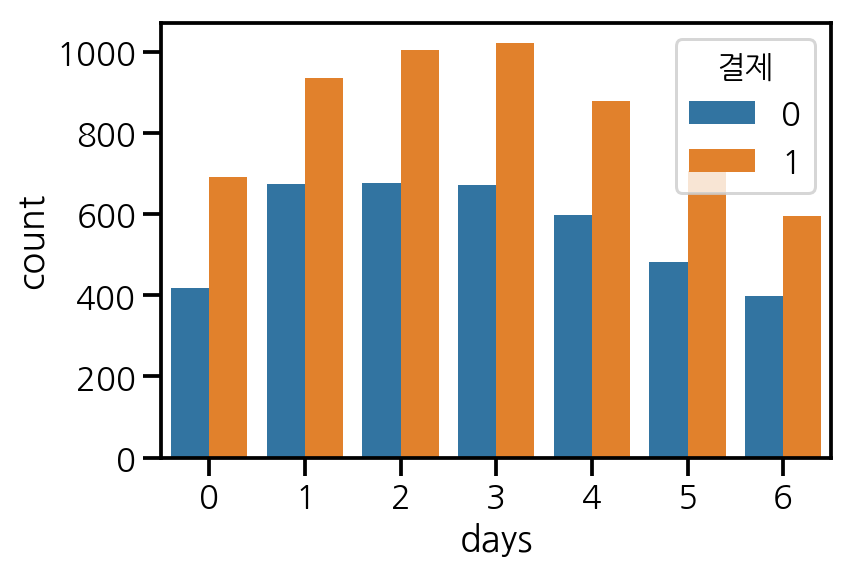

In [665]:
sns.countplot(data=ds, x='days', hue='결제')
#월화수목이 비교적 결제가 많음
#금토의 취소율이 비교적 높음

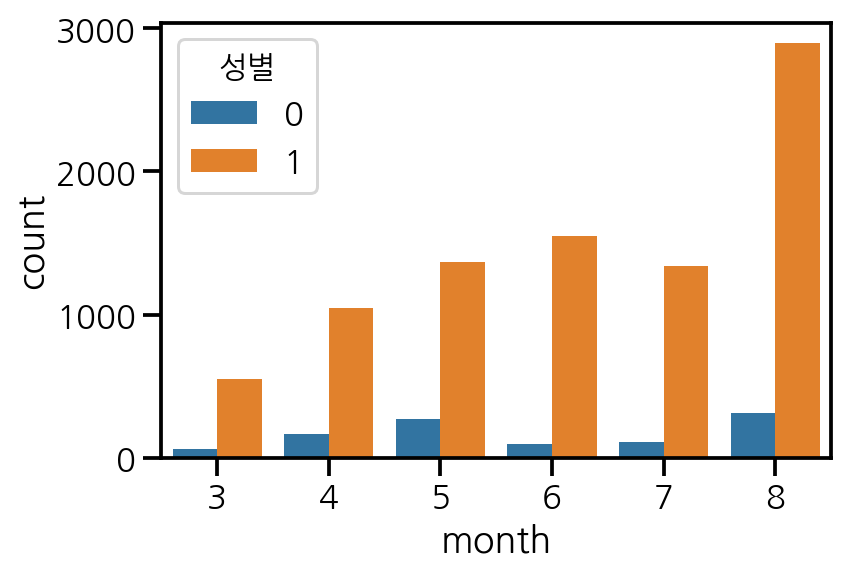

In [666]:
sns.countplot(data=ds, x='month', hue='성별')
#6월 7월의 남자 유입이 적음, 대다수가 여자
#여름 다이어트, 노출에 대해 여자가 더 민감

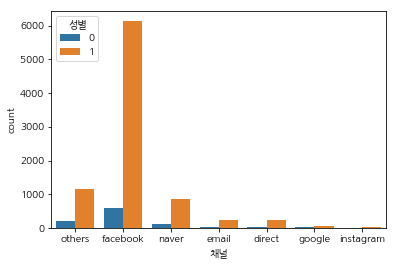

In [66]:
sns.countplot(data=ds, x='채널', hue='성별')

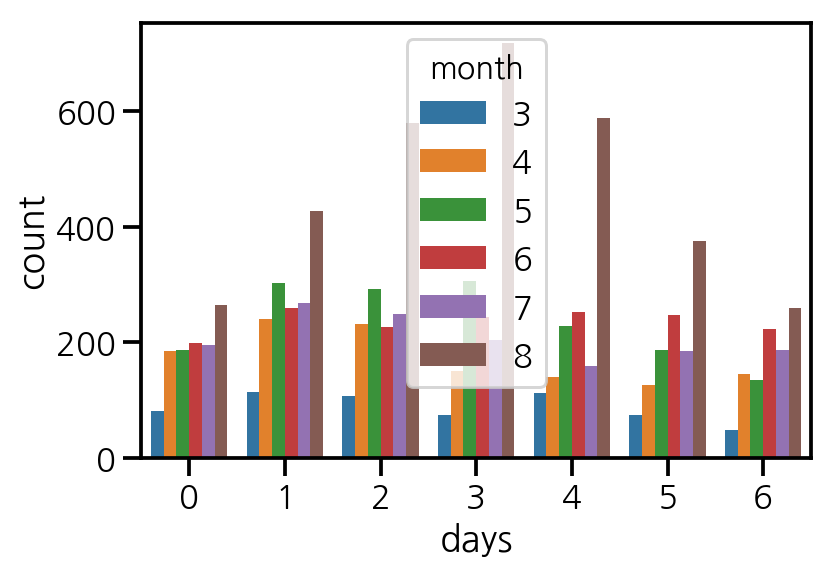

In [667]:
sns.countplot(data=ds, x='days', hue='month')
#8월은 정규분포화스러움 - 표본이 많아짐
#8월 수요일에 왜 많을까?

In [668]:
def timetodays(row):
    return row[-18:-16]

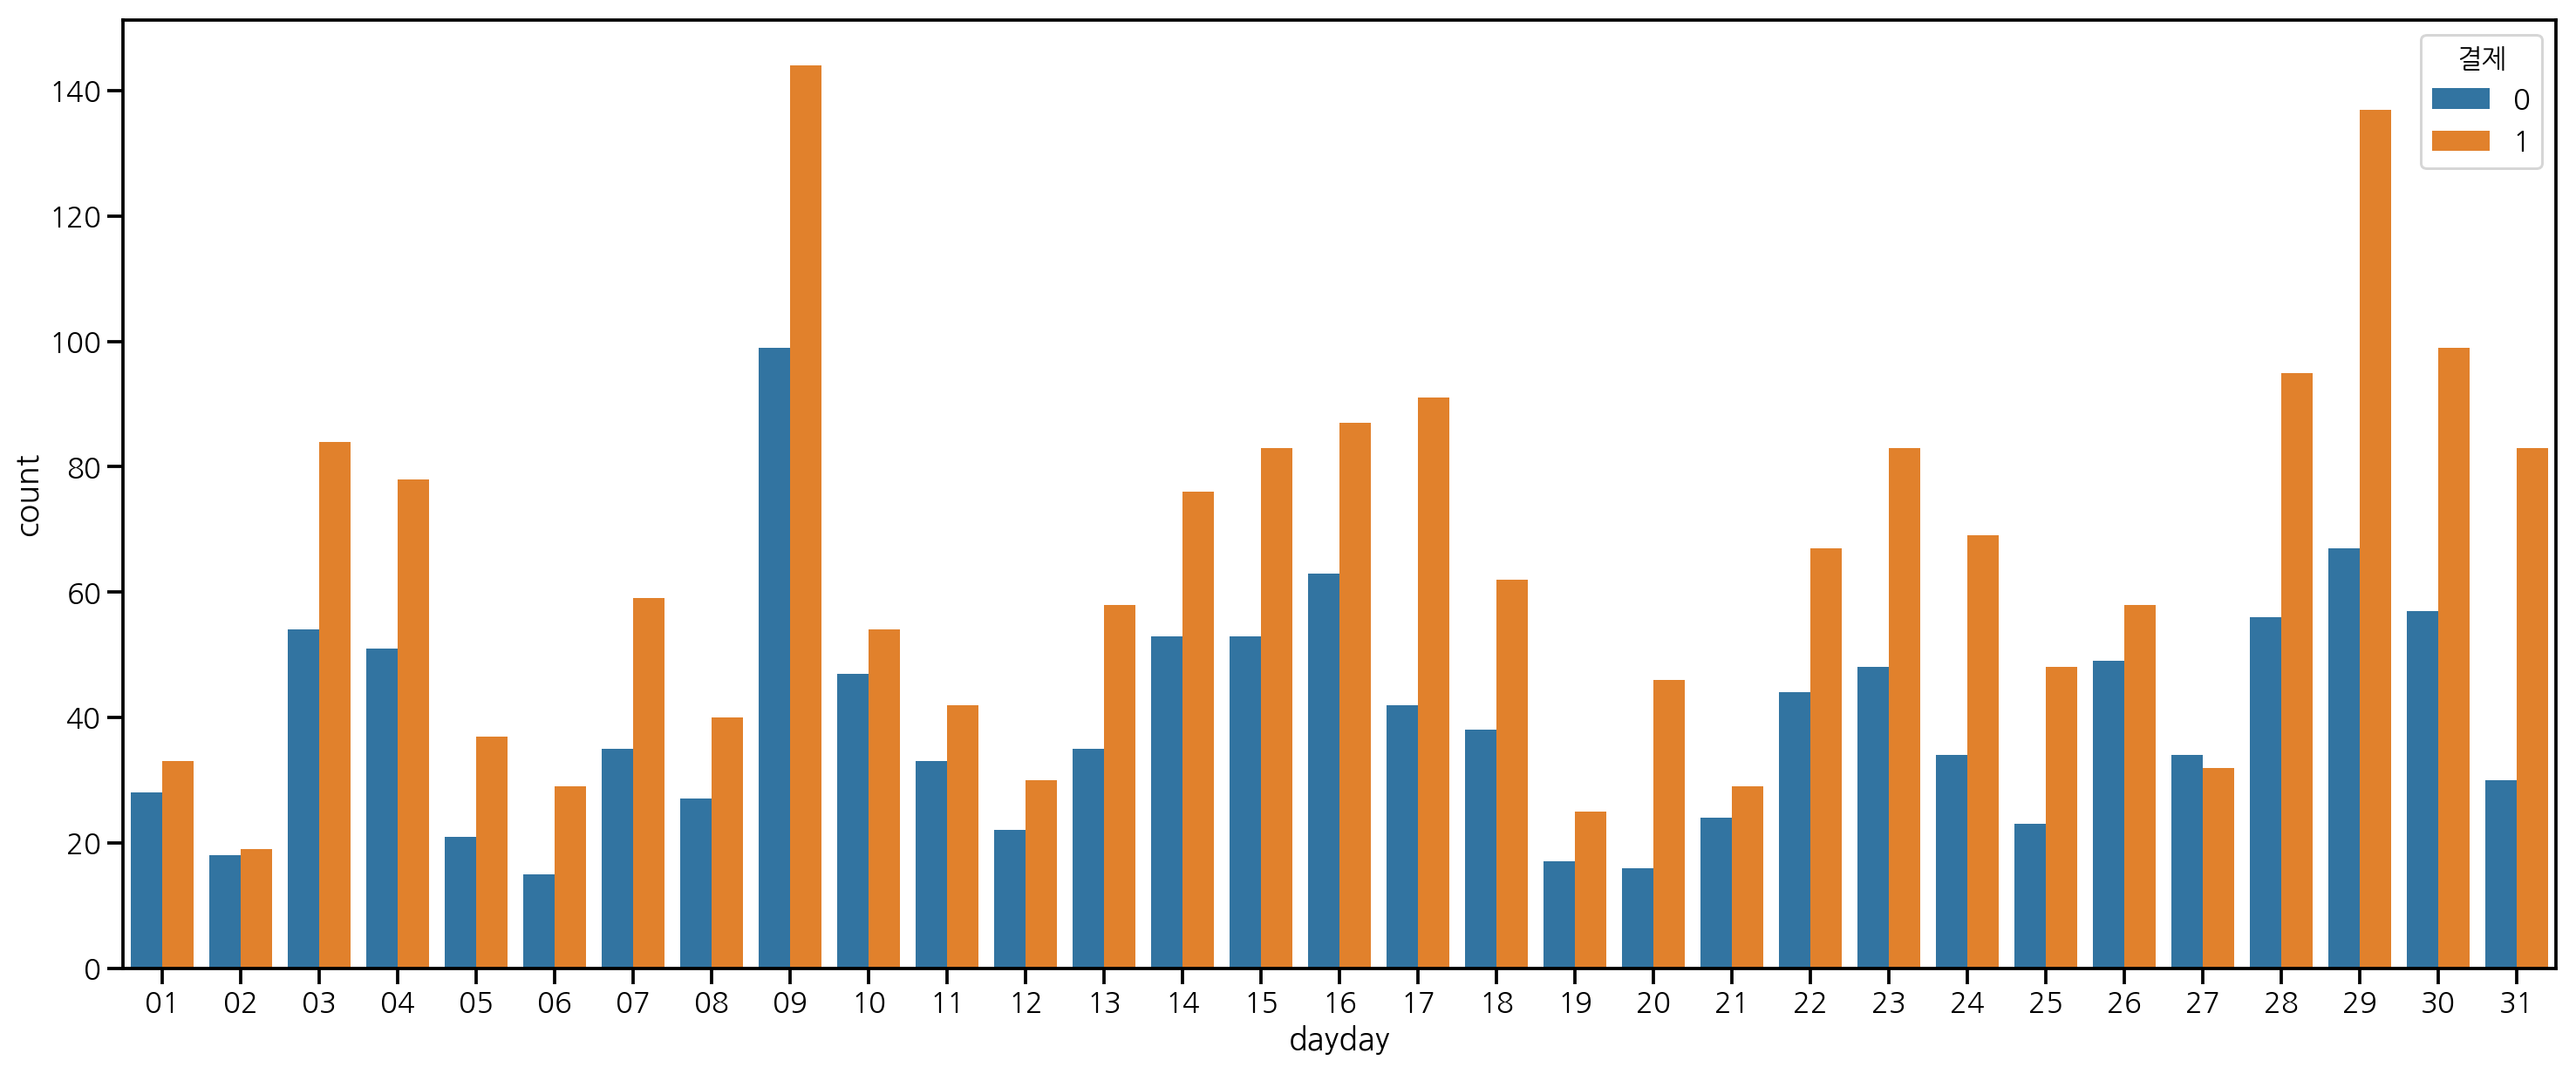

In [669]:
ds['dayday']=ds['time'].apply(timetodays)
ds['dayday'].head()
plt.figure(figsize=[25,10])
sns.countplot(data=ds[ds['month']==8], x='dayday', hue='결제')
#8월 9일에 매우 많음 : 특별할인 등의 프로모션 가능성 높음
#8월 29일에도 높고, 30일에 높음 


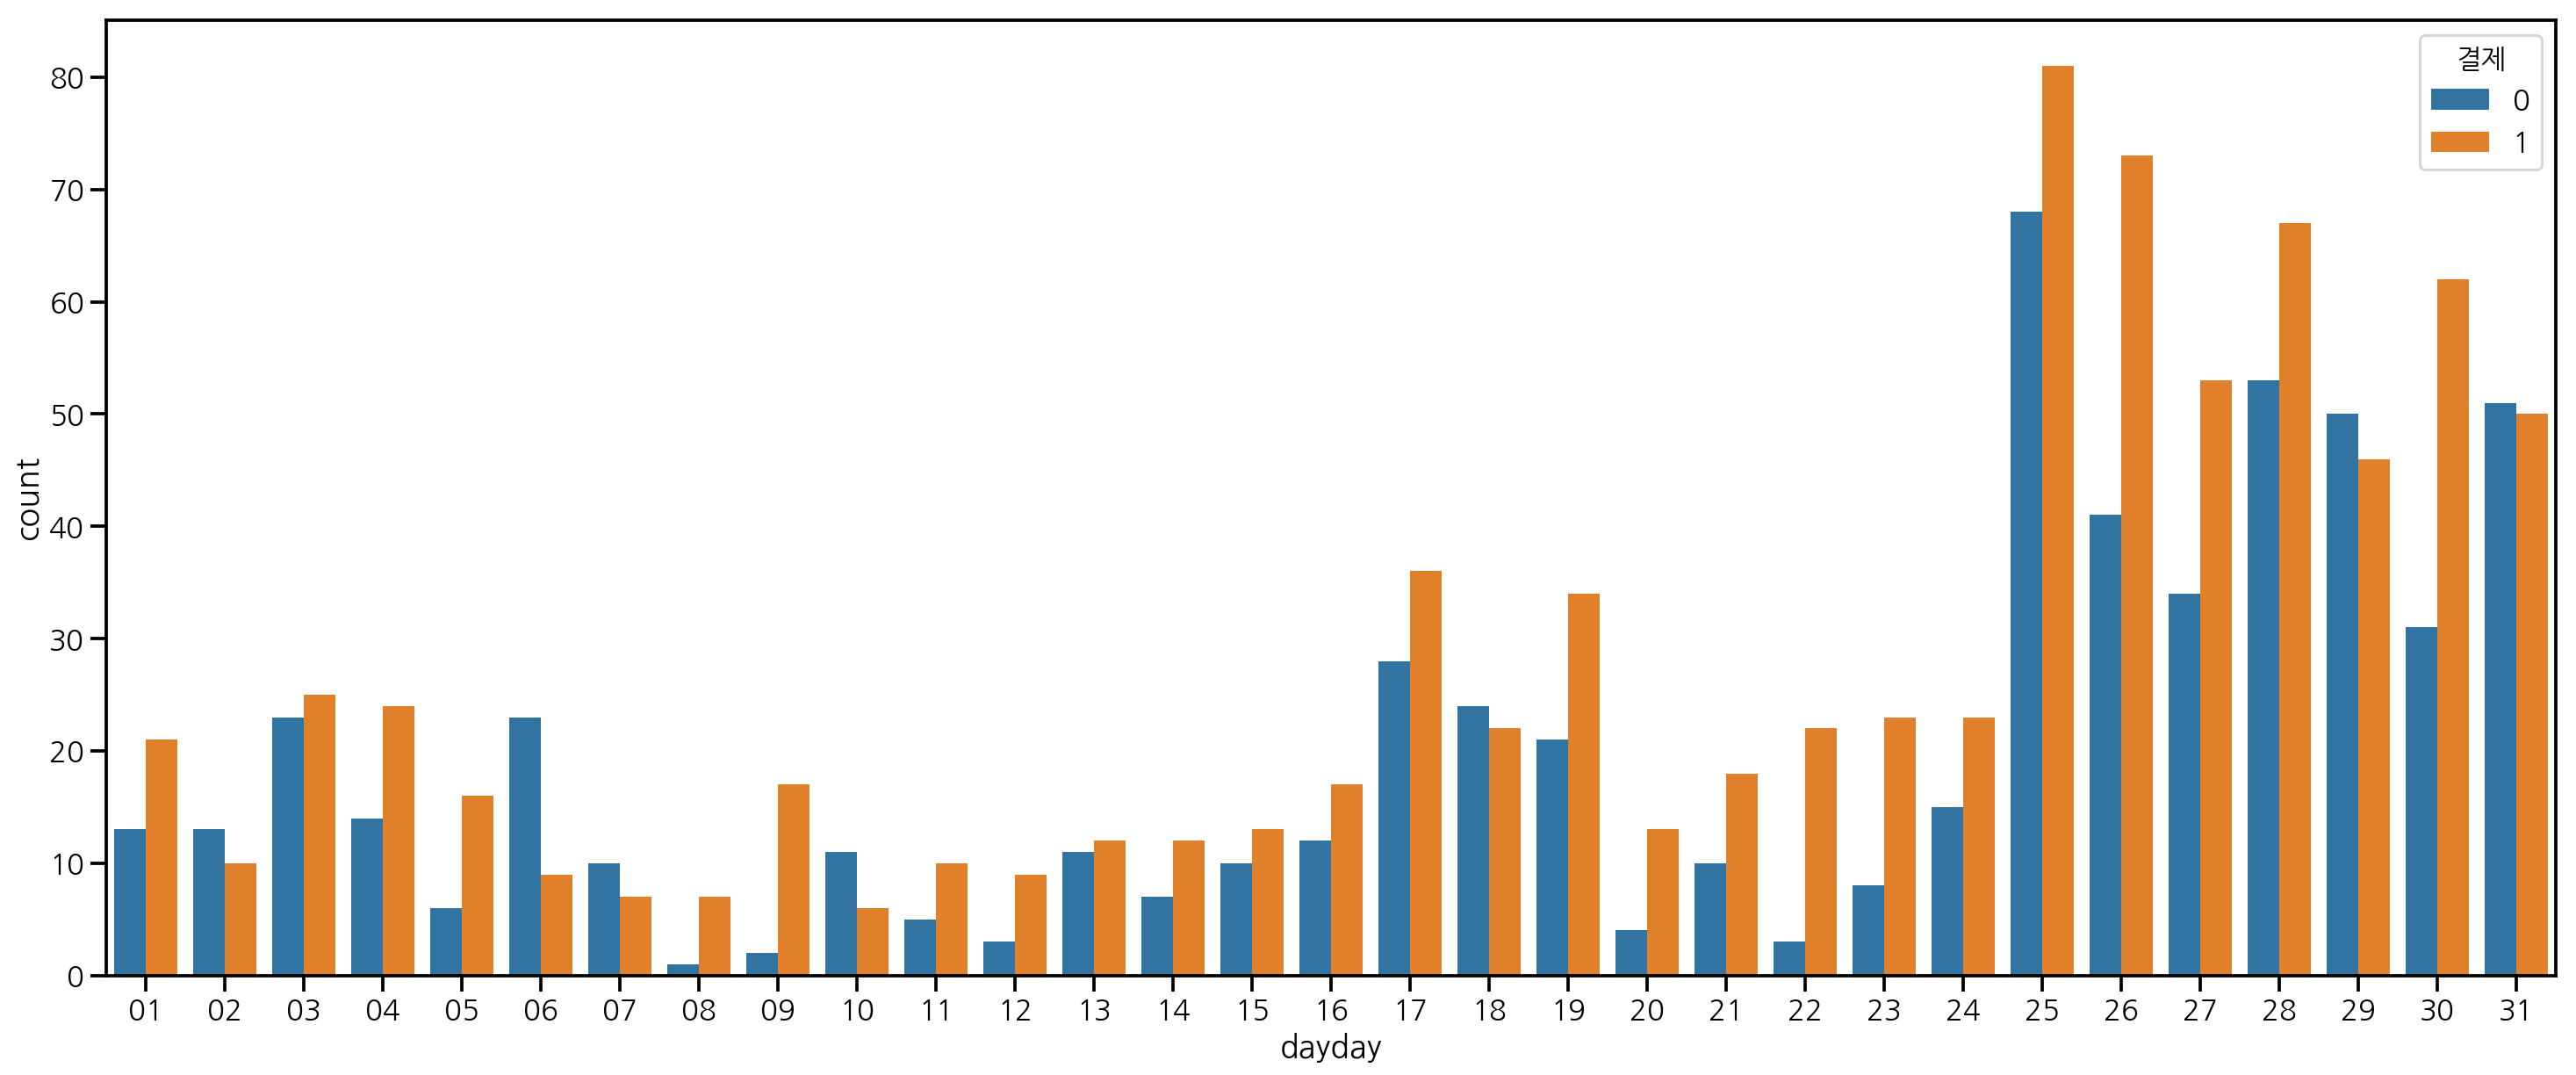

In [670]:
plt.figure(figsize=[25,10])
sns.countplot(data=ds[ds['month']==7], x='dayday', hue='결제')
#7월 25일, 화요일부터 매우 높은 유입


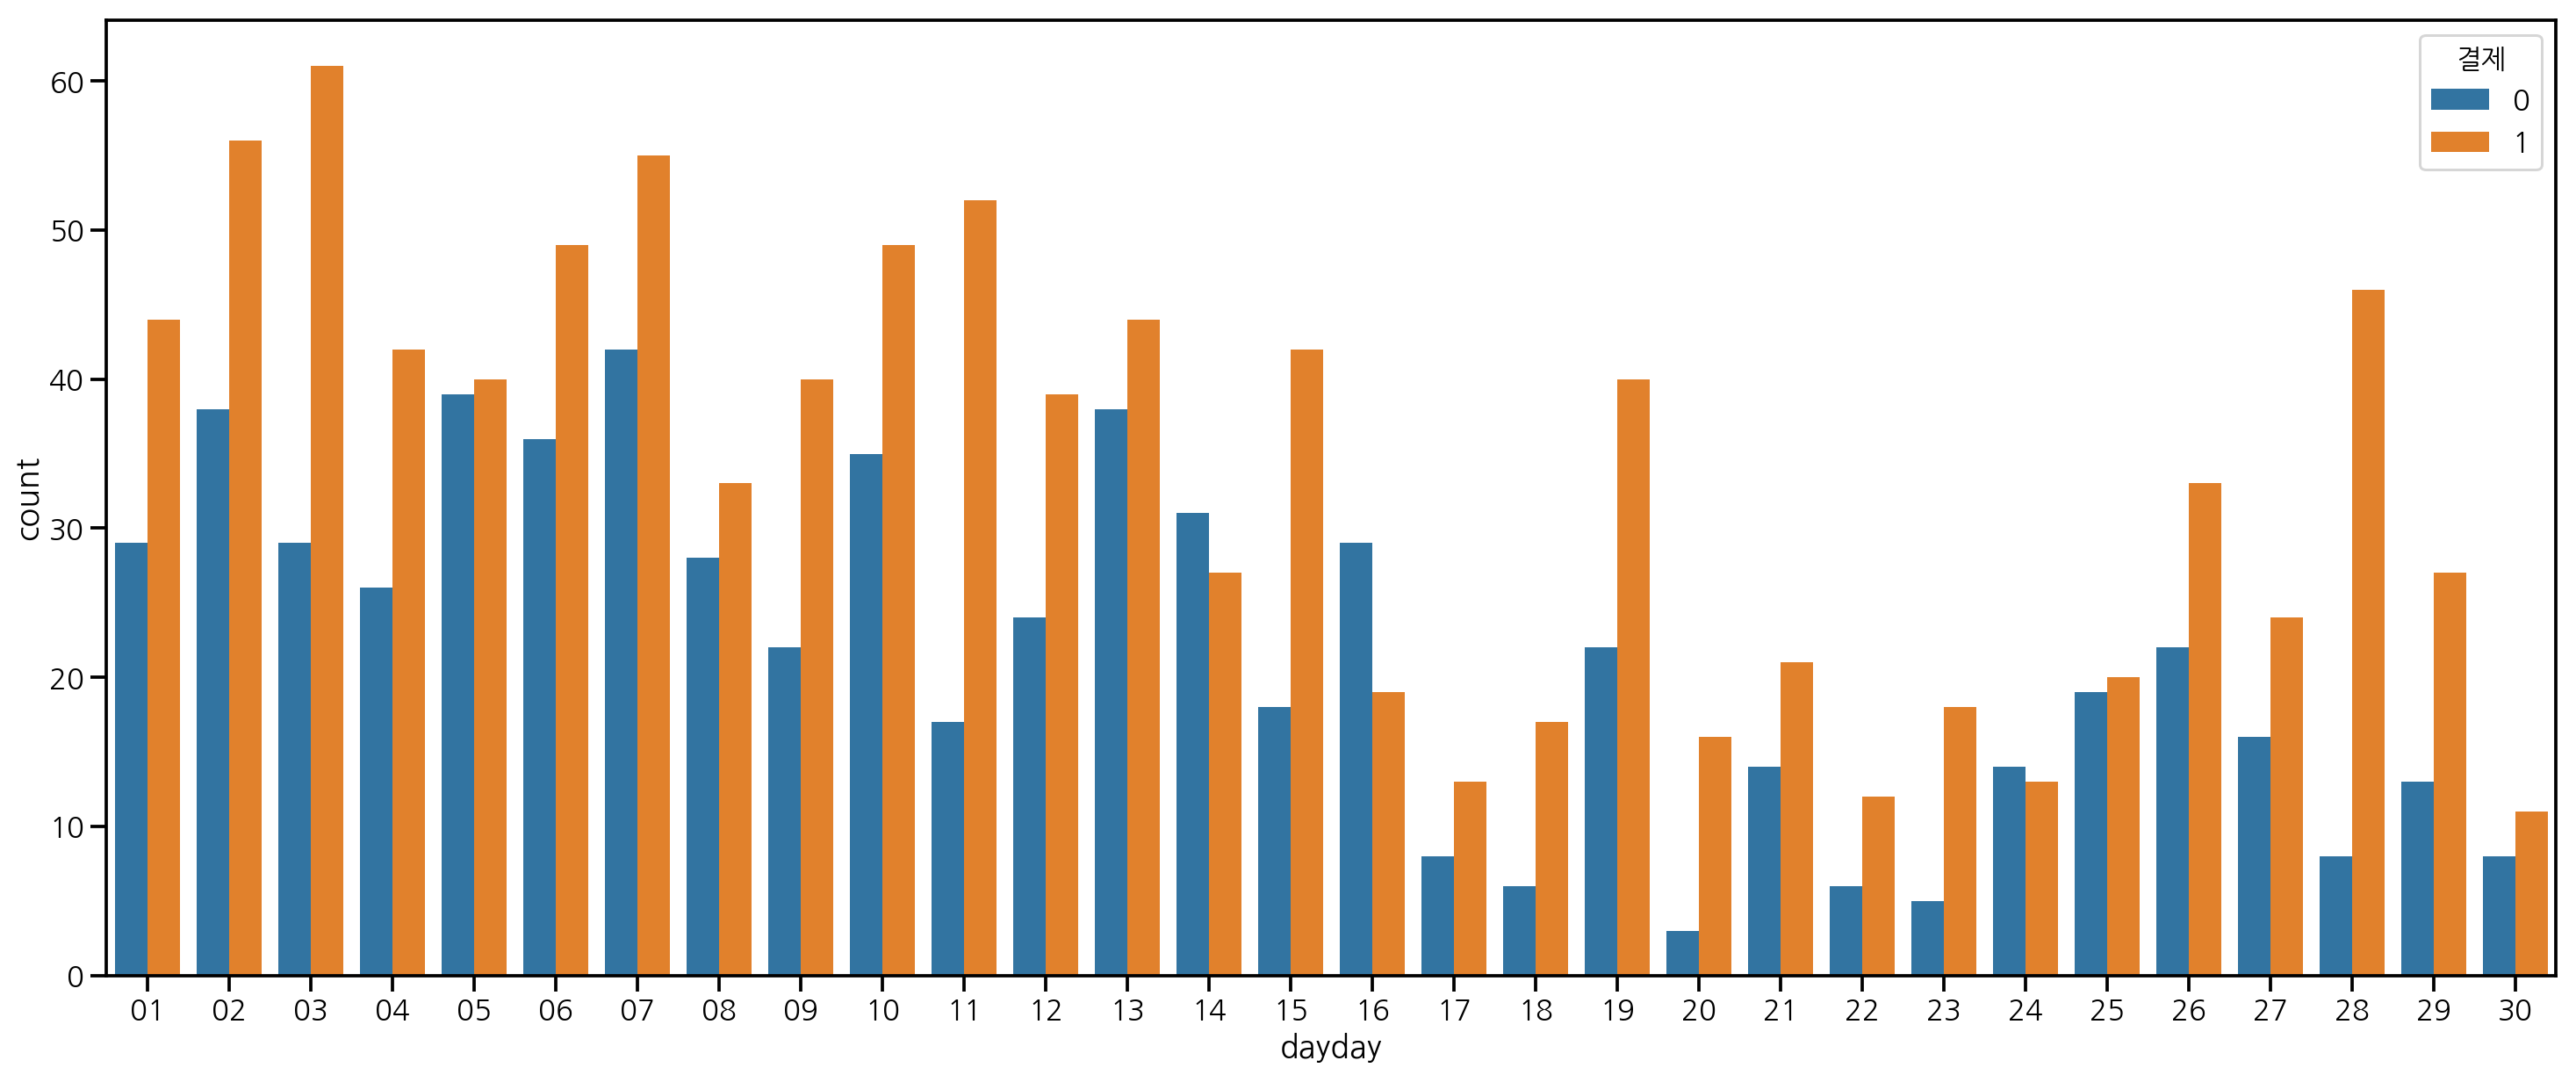

In [671]:
plt.figure(figsize=[25,10])
sns.countplot(data=ds[ds['month']==6], x='dayday', hue='결제')

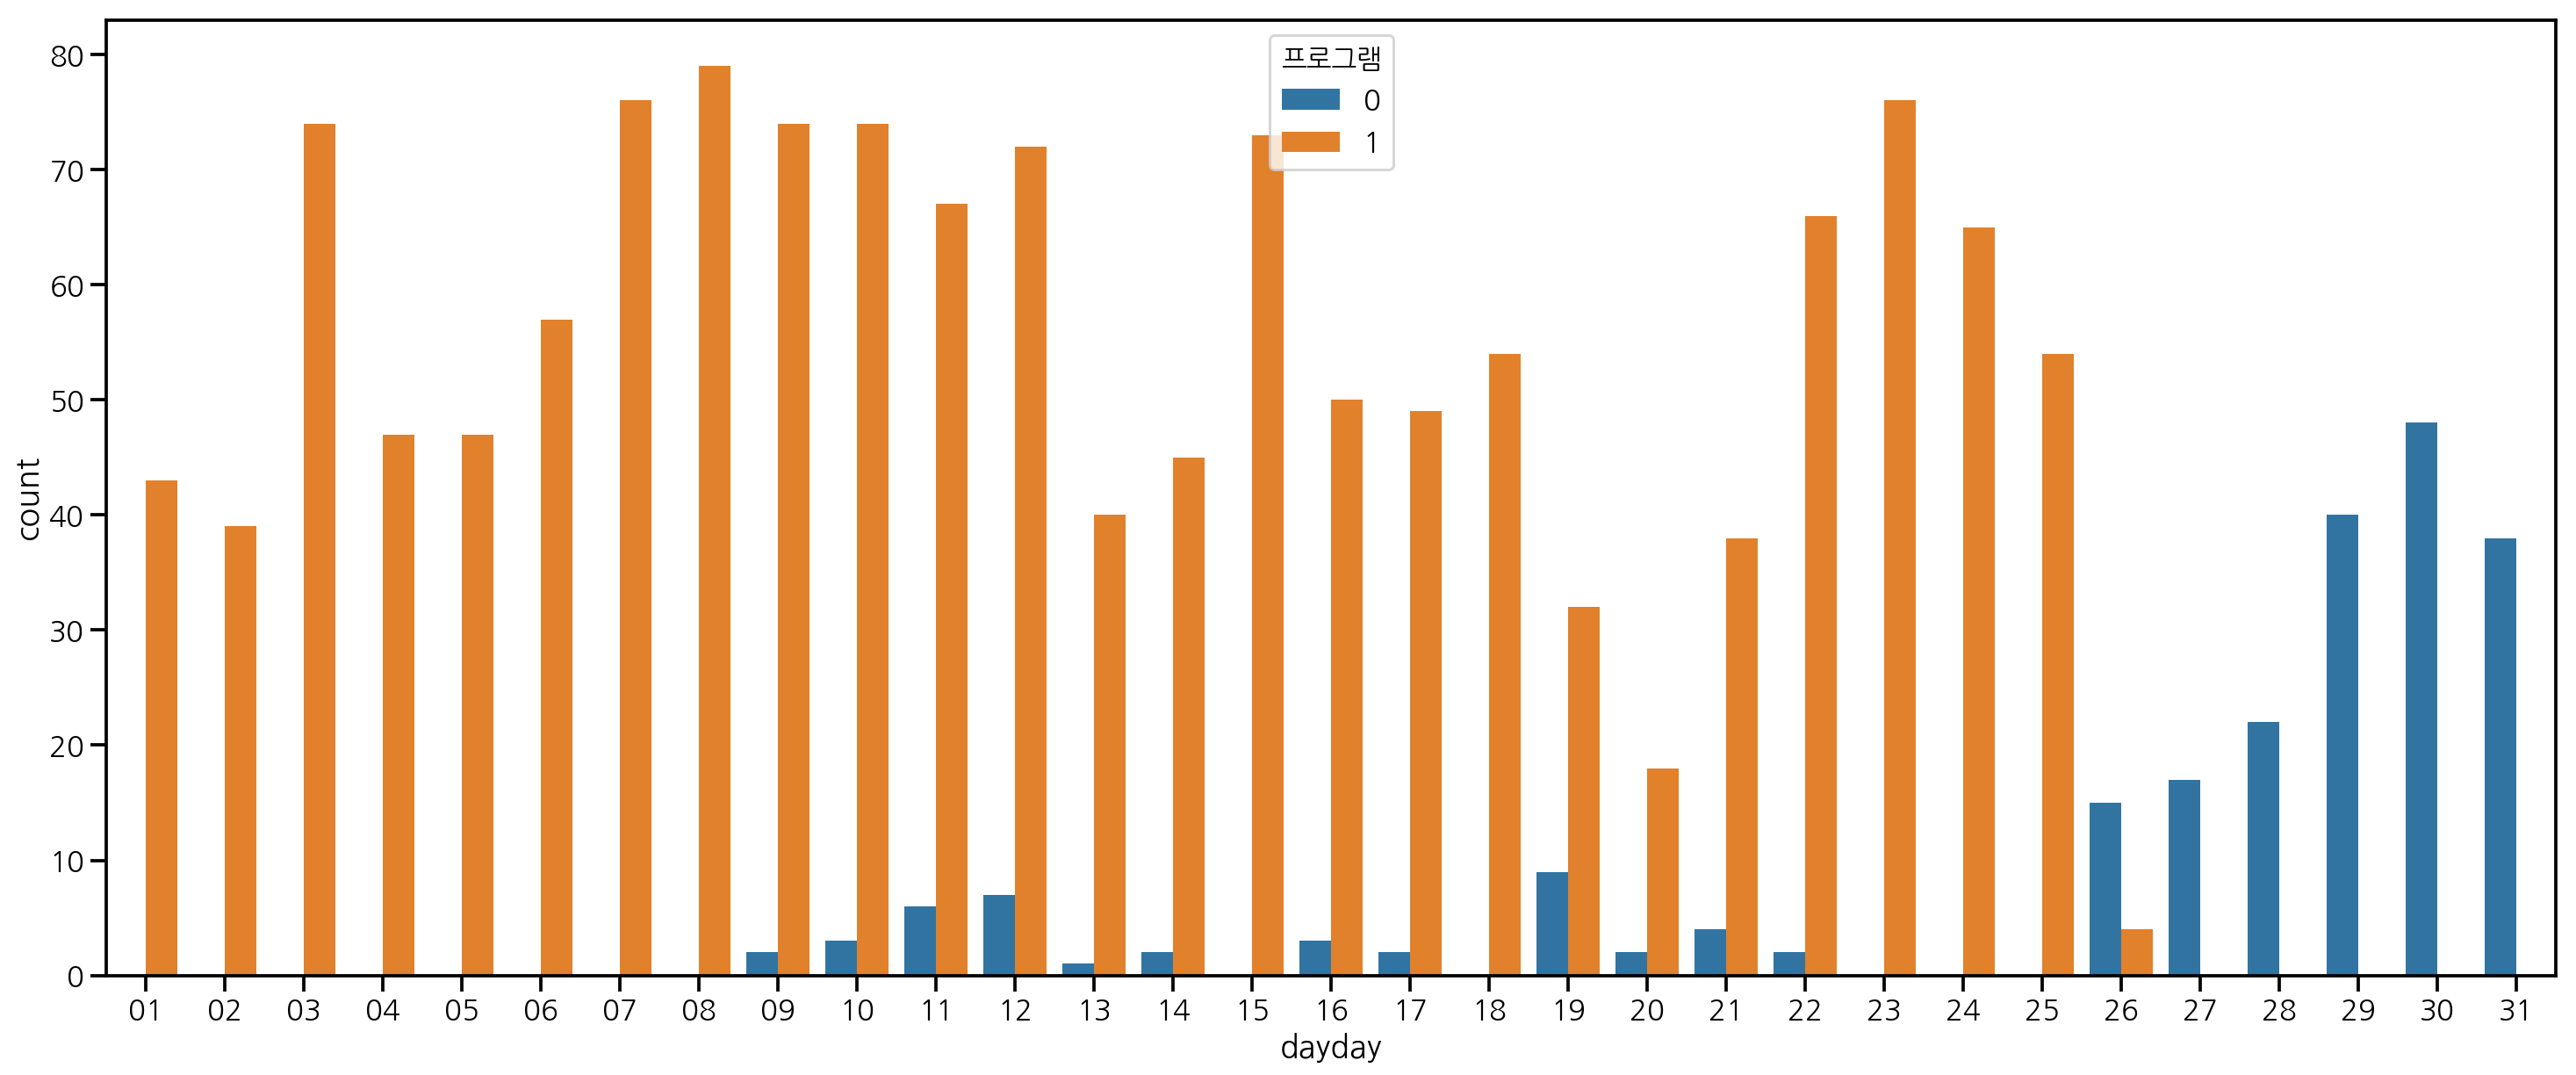

In [672]:
plt.figure(figsize=[25,10])
sns.countplot(data=ds[ds['month']==5], x='dayday', hue='프로그램')

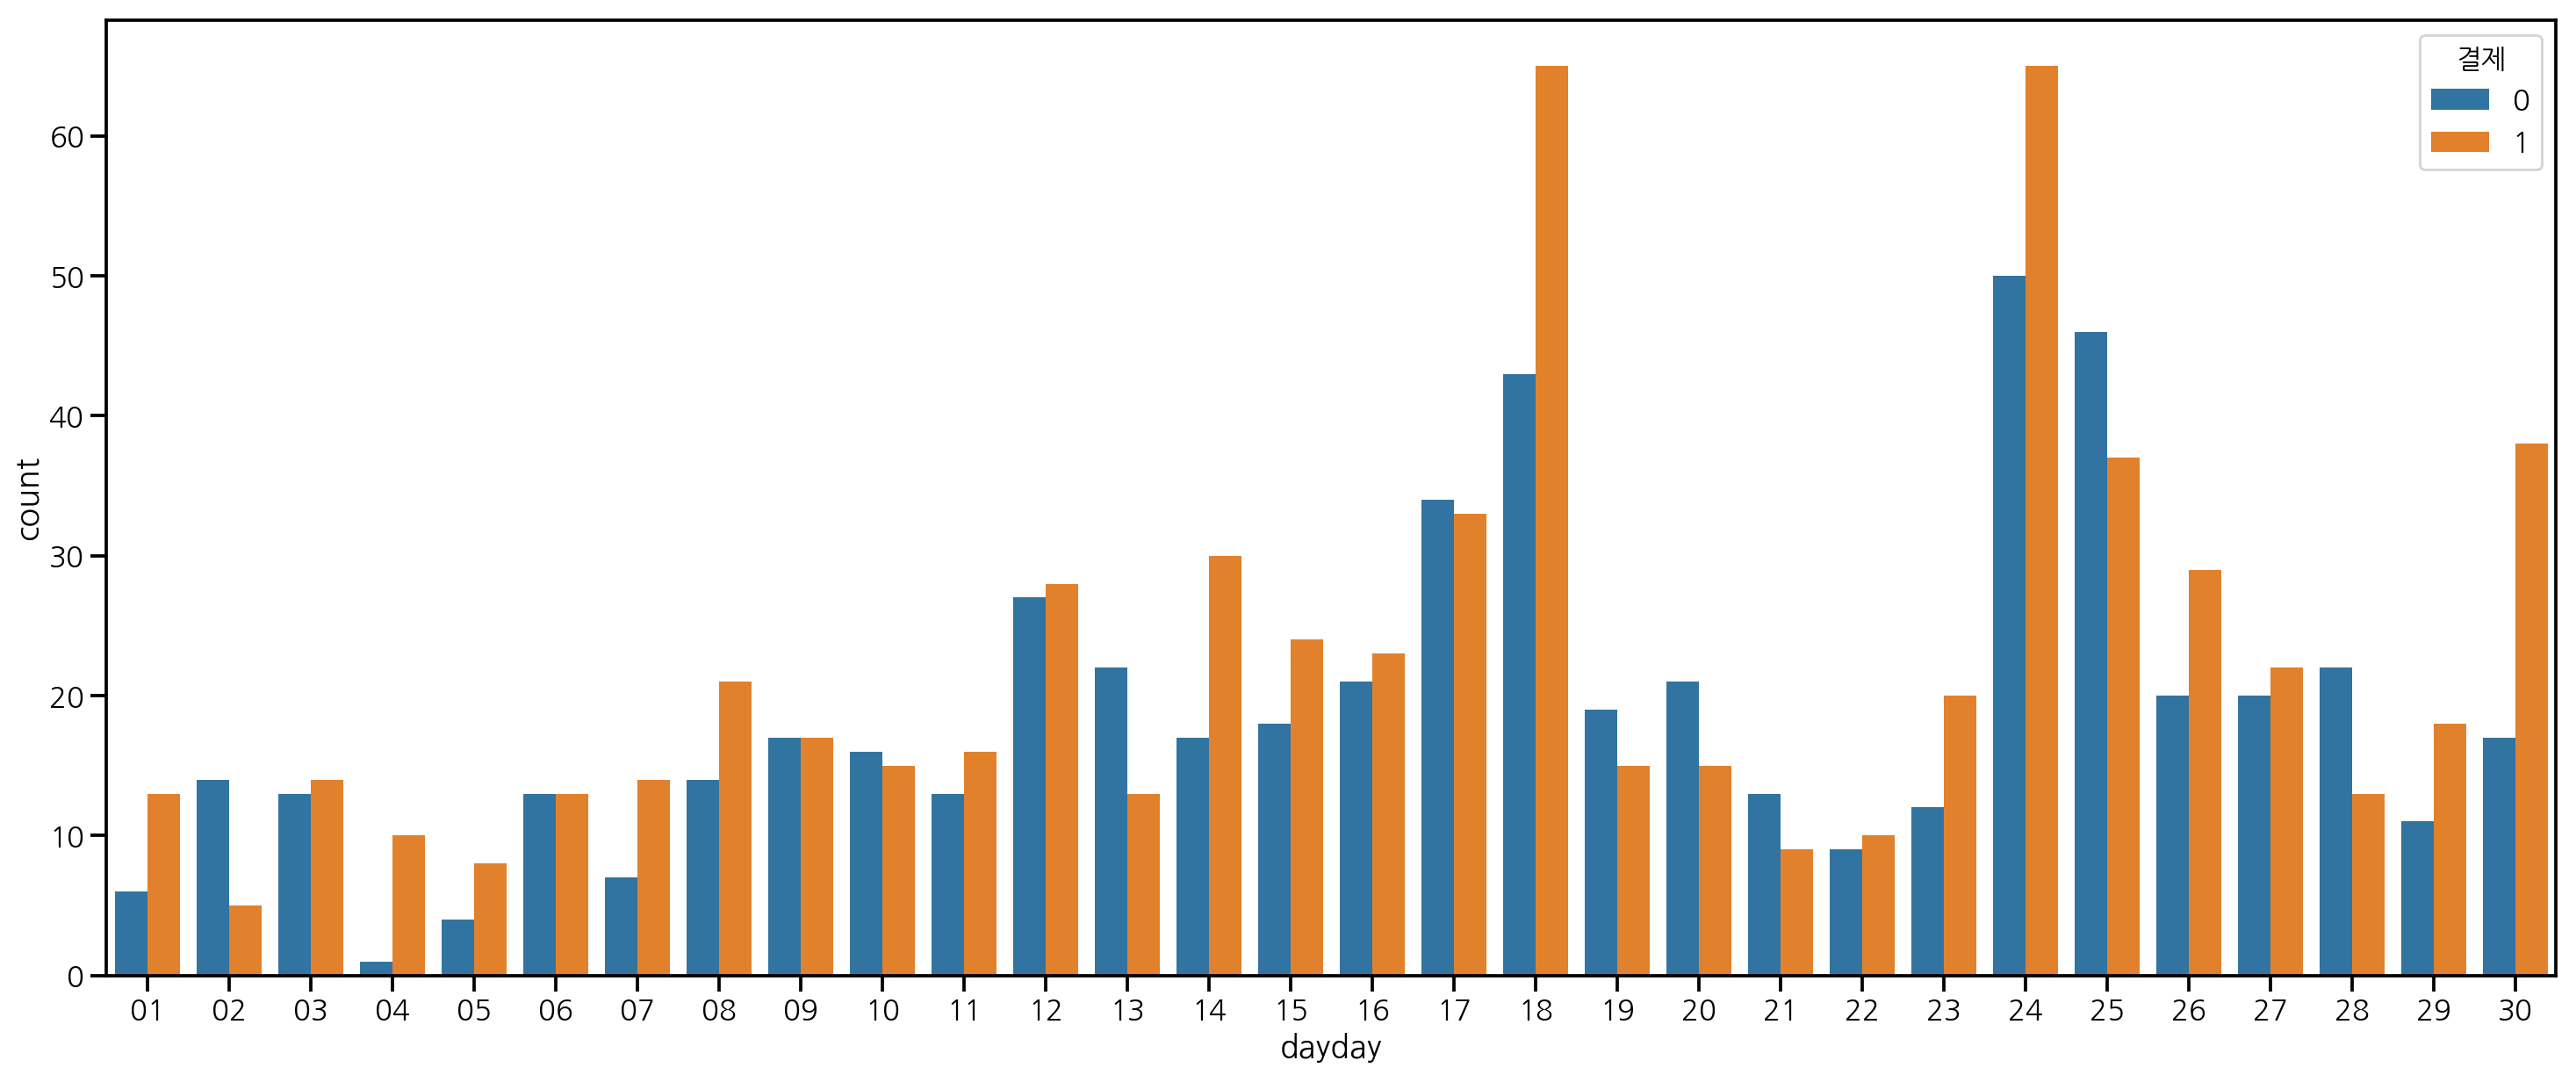

In [673]:
plt.figure(figsize=[25,10])
sns.countplot(data=ds[ds['month']==4], x='dayday', hue='결제')

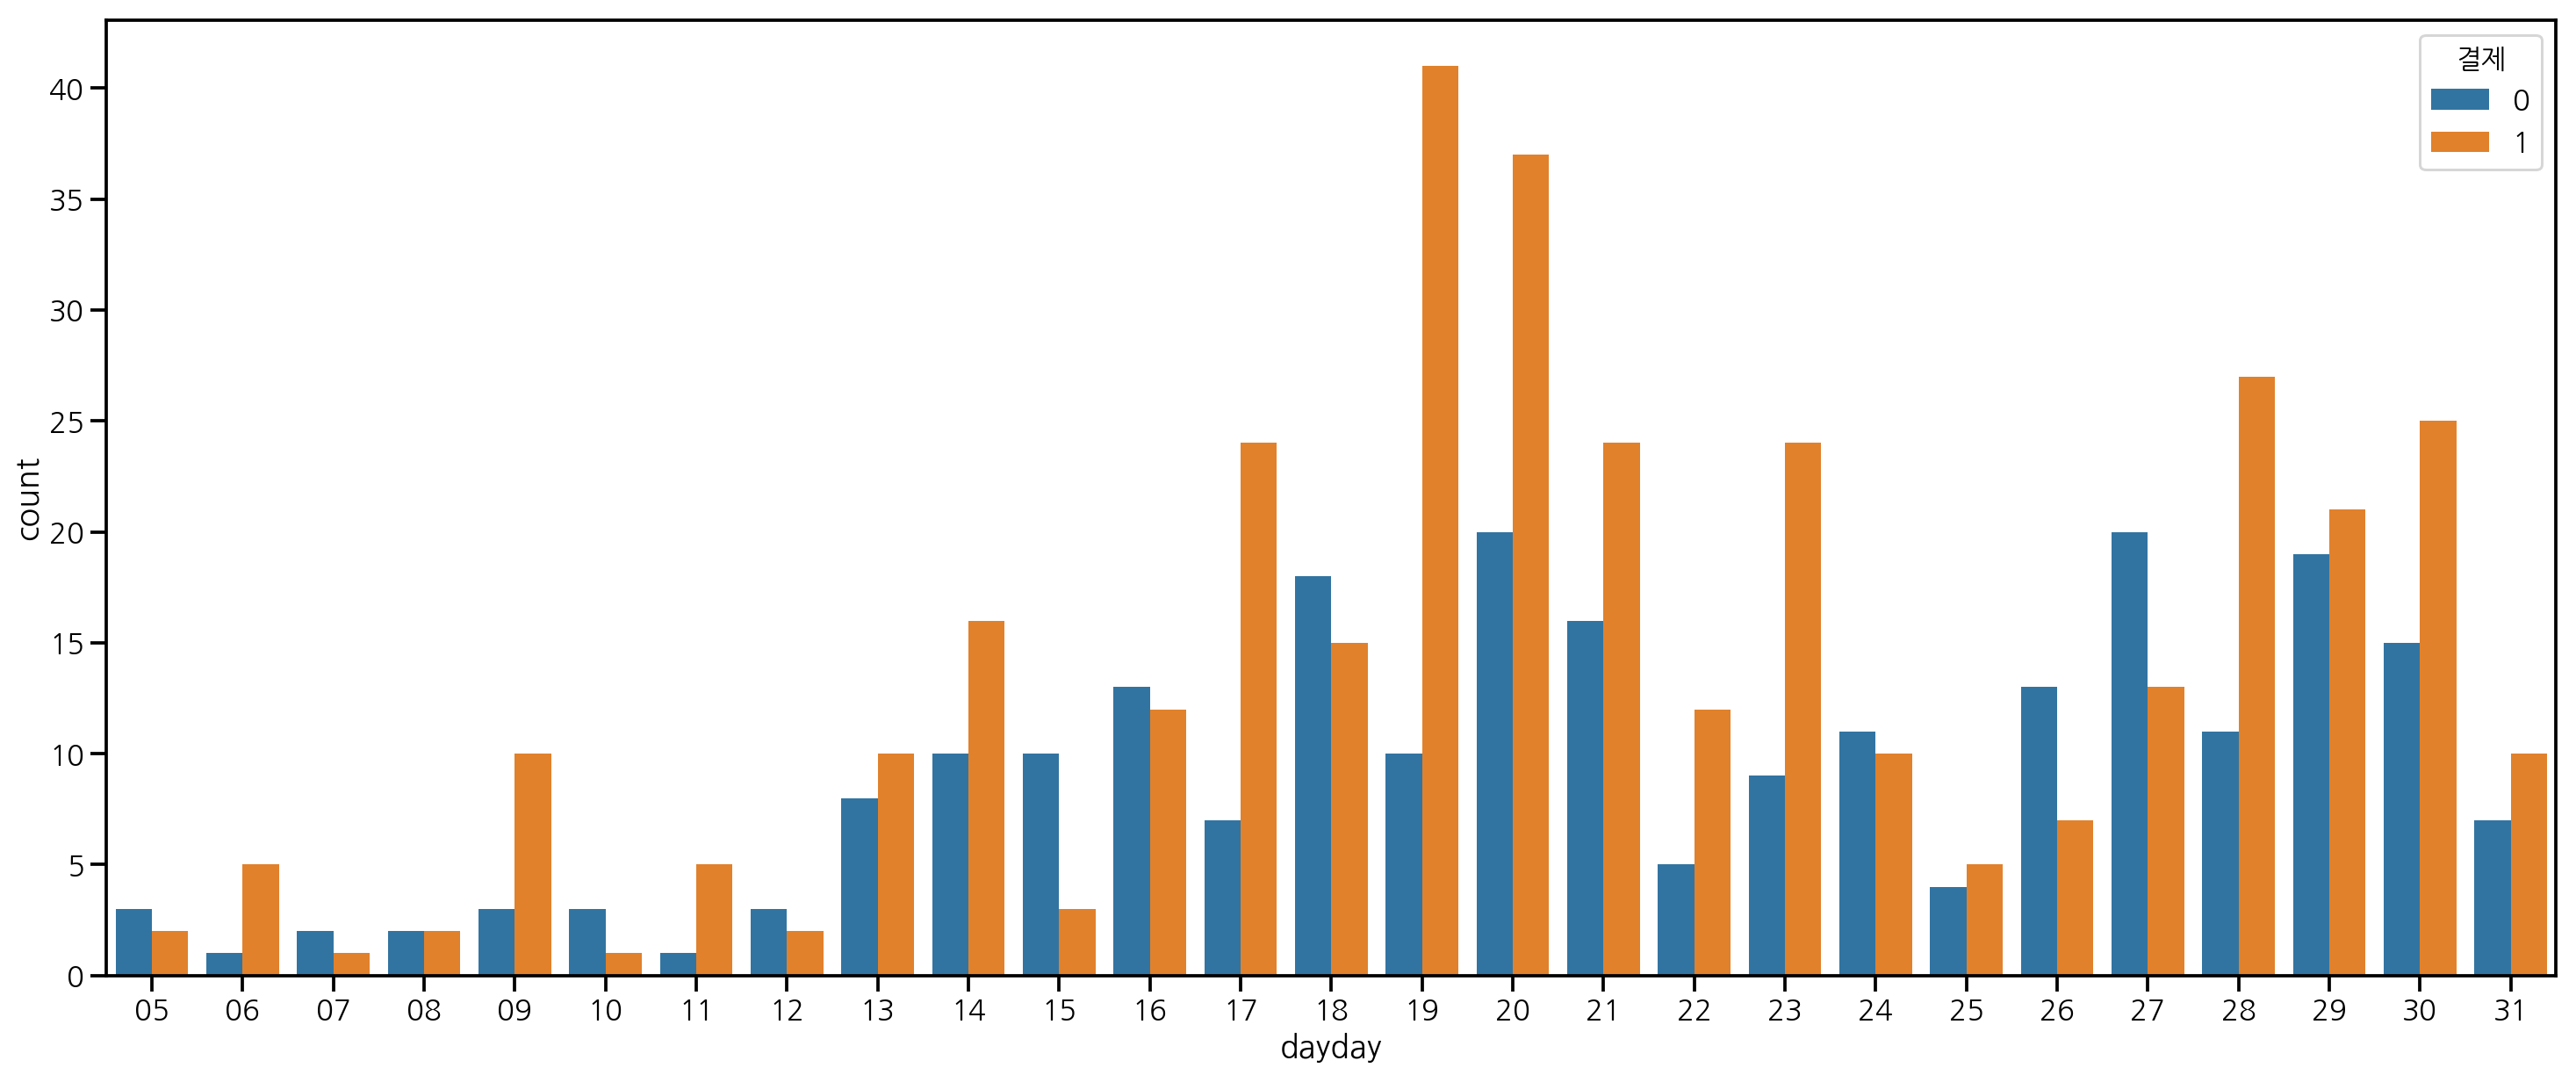

In [674]:
plt.figure(figsize=[25,10])
sns.countplot(data=ds[ds['month']==3], x='dayday', hue='결제')

In [714]:
ds.columns

Index(['회원코드', '연령', '신장', '회원초기체중', '최저체중', '목표체중', '당뇨여부', '음주여부', '운동횟수',
       '건보식복', 'agegroup', '체중감소량', '목표체중감소량', 'BMI', '성별', '상태', '프로그램가격',
       '최종결제금액', '채널', '보조식품가격', '보식추구', 'time', 'month', 'day', 'hour', '결제',
       '프로그램', '나이대', 'days', 'dayday', 'VIP'],
      dtype='object')

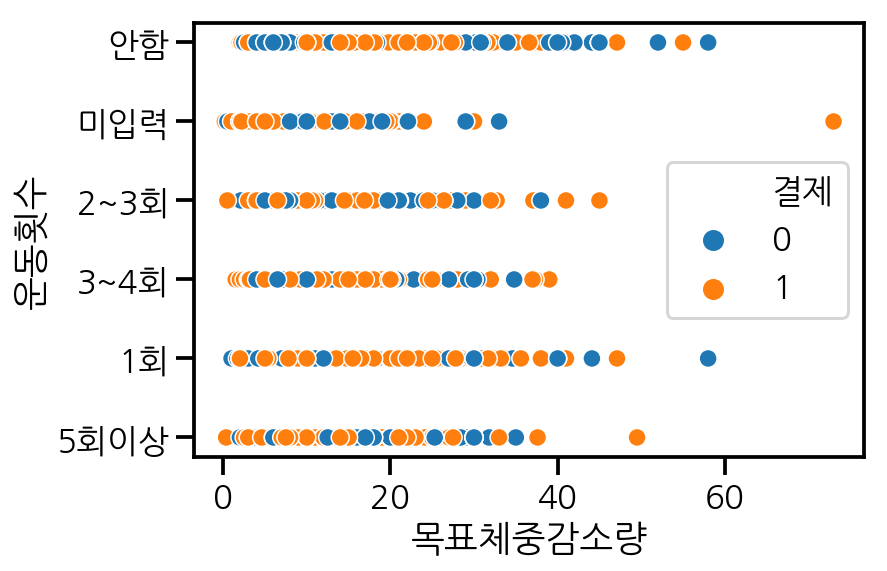

In [754]:
sns.scatterplot(data=ds, x='목표체중감소량', y='운동횟수', hue='결제')

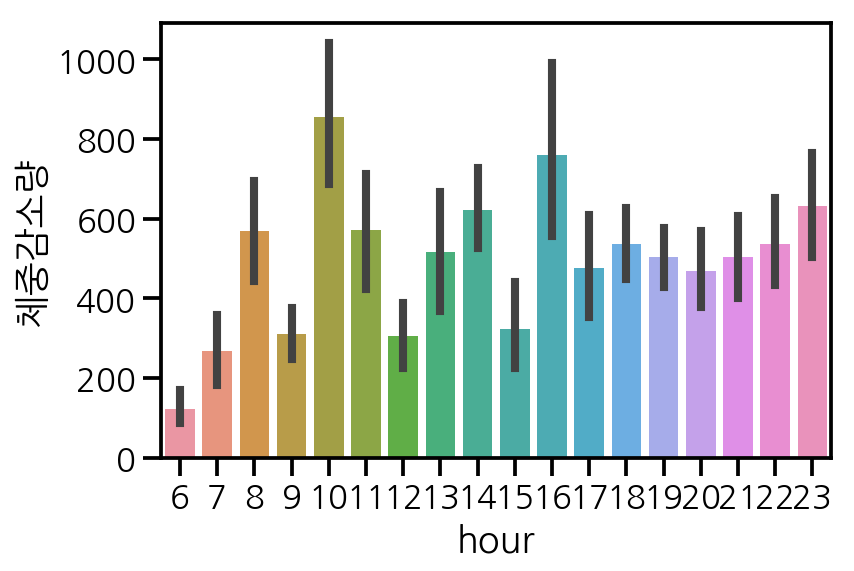

In [726]:
sns.barplot(data=ds[ds['hour']>=6], x='hour', y='체중감소량', estimator=sum)

In [677]:
ds.info()
ds.shape

ds['VIP'] = np.zeros(ds.shape[0], dtype='i')
ds_completed=ds[ds['상태']=='completed']
ds_vip=ds_completed[ds_completed['BMI']> 30]
ds_VIP=ds_vip[ds_vip['목표체중감소량']> 10]

ds['VIP'].loc[ds_VIP.index]=1
ds['VIP'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9758 entries, 0 to 9757
Data columns (total 31 columns):
회원코드              9758 non-null object
연령                9758 non-null int64
신장                9758 non-null float64
회원초기체중            9758 non-null float64
최저체중              5698 non-null float64
목표체중              9758 non-null int64
당뇨여부(설문)          9758 non-null object
음주여부(설문)          9758 non-null object
일주일운동횟수(설문)       9758 non-null object
건강보조식품복용여부(설문)    9758 non-null object
agegroup          9758 non-null object
체중감소량             5695 non-null float64
목표체중감소량           9758 non-null float64
BMI               9758 non-null float64
성별                9758 non-null int64
상태                9758 non-null object
프로그램가격            9758 non-null int64
최종결제금액            9758 non-null int64
채널                9758 non-null object
보조식품가격            9758 non-null int64
보조식품(추가구매)        9758 non-null object
time              9758 non-null object
month             9758 non-null int

0    9435
1     323
Name: VIP, dtype: int64

In [150]:
ds_char=ds.select_dtypes(include="object")
ds_numeric=ds.select_dtypes(exclude="object")
ds_char.head()
ds_numeric.head()

,연령,신장,회원초기체중,최저체중,목표체중,체중감소량,목표체중감소량,BMI,성별,프로그램가격,최종결제금액,보조식품가격,month,hour,결제,프로그램,days
0,25,172.0,66.9,65.8,55,1.1,11.9,22.613575,1,112500,112500,0,4,19,1,1,5
1,26,176.0,70.0,NaN,65,NaN,5.0,22.598140,0,44780,44780,0,5,20,1,1,2
2,23,171.0,98.0,NaN,91,NaN,7.0,33.514586,1,132000,149000,17000,8,23,1,0,3
3,20,160.0,70.7,NaN,53,NaN,17.7,27.617188,1,112500,112500,0,8,20,1,0,1
4,28,165.0,55.5,NaN,52,NaN,3.5,20.385675,1,44780,44780,0,5,17,1,1,0


In [291]:
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') #경고 무시

In [567]:
# ds['순결제']=ds['상태'].replace('cancelled',0).replace('refunded',0).replace('completed',1)

In [601]:
ds_vip.columns
# ds_dummy=pd.get_dummies(ds)
# ds_dummy.head()

Index(['회원코드', '연령', '신장', '회원초기체중', '최저체중', '목표체중', '당뇨여부', '음주여부', '운동횟수',
       '건보식복', 'agegroup', '체중감소량', '목표체중감소량', 'BMI', '성별', '상태', '프로그램가격',
       '최종결제금액', '채널', '보조식품가격', '보식추구', 'time', 'month', 'day', 'hour', '결제',
       '프로그램', '나이대', 'days', 'dayday', '순결제', 'VIP'],
      dtype='object')

In [680]:
ds = ds.rename(columns={'당뇨여부(설문)': '당뇨여부', '음주여부(설문)': '음주여부', '일주일운동횟수(설문)': '운동횟수', '건강보조식품복용여부(설문)': '건보식복', '보조식품(추가구매)': '보식추구'})
ds.columns

Index(['회원코드', '연령', '신장', '회원초기체중', '최저체중', '목표체중', '당뇨여부', '음주여부', '운동횟수',
       '건보식복', 'agegroup', '체중감소량', '목표체중감소량', 'BMI', '성별', '상태', '프로그램가격',
       '최종결제금액', '채널', '보조식품가격', '보식추구', 'time', 'month', 'day', 'hour', '결제',
       '프로그램', '나이대', 'days', 'dayday', 'VIP'],
      dtype='object')

In [617]:
# ds1_vip = ds_vip[['VIP','연령','BMI','성별','음주여부','채널','hour','프로그램','days']]
# ds2_vip = pd.get_dummies(ds1)

In [681]:
np.random.seed(seed=1234)
msk=np.random.rand(ds.shape[0],)<0.7
sc_train=ds[msk]
sc_test=ds[~msk]
print("train data size: {}".format(sc_train.shape))
print("test datasize: {}".format(sc_test.shape))

train data size: (6823, 31)
test datasize: (2935, 31)


In [682]:
sc_train=sm.add_constant(sc_train)
sc_train.head()

,const,회원코드,연령,신장,회원초기체중,최저체중,목표체중,당뇨여부,음주여부,운동횟수,...,time,month,day,hour,결제,프로그램,나이대,days,dayday,VIP
0,1.0,Y9RY2VSI,25,172.0,66.9,65.8,55,없음,미입력,5회이상,...,2017-04-14 19:03:29.976000,4,Friday,19,1,1,20대 후반,5,14,0
1,1.0,3GTN3S3B,26,176.0,70.0,NaN,65,없음,미입력,5회이상,...,2017-05-23 20:53:54.368000,5,Tuesday,20,1,1,20대 후반,2,23,0
2,1.0,6B0IG276,23,171.0,98.0,NaN,91,없음,마시지않음,5회이상,...,2017-08-23 23:39:21.840000,8,Wednesday,23,1,0,20대 초반,3,23,0
5,1.0,2GHCC4T1,26,157.0,67.8,66.4,63,없음,미입력,5회이상,...,2017-08-24 08:24:43.256000,8,Thursday,8,0,0,20대 후반,4,24,0
6,1.0,ERJUS7LV,41,160.0,54.1,NaN,50,없음,미입력,5회이상,...,2017-05-25 09:38:14.776000,5,Thursday,9,0,1,40대,4,25,0


In [693]:
log_model1=sm.Logit.from_formula(""" VIP ~ 회원초기체중 +성별 + C(건보식복) + BMI + C(채널) + 프로그램 + 1""", sc_train)
log_result1=log_model1.fit() 
print(log_result1.summary())

         Current function value: 0.091668
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    VIP   No. Observations:                 6823
Model:                          Logit   Df Residuals:                     6810
Method:                           MLE   Df Model:                           12
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.3610
Time:                        21:57:20   Log-Likelihood:                -625.45
converged:                      False   LL-Null:                       -978.78
                                        LLR p-value:                1.650e-143
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -12.6792      0.675    -18.788      0.000     -14.002     -11.357
C(건보식복)[T.없음]         -0.4542      0.258 

In [618]:
sc_y=ds2_vip["VIP"]
sc_x=ds2_vip("VIP" ,axis=1, inplace=False)

sc_train_x, sc_test_x, sc_train_y, sc_test_y = train_test_split(sc_x,sc_y,test_size=0.3, random_state=1234)
print("train data X size: {}".format(sc_train_x.shape))
print("train data Y size: {}".format(sc_train_y.shape))
print("test data X size: {}".format(sc_test_x.shape))
print("test data Y size: {}".format(sc_test_y.shape))

KeyError: 'VIP'

In [574]:
# sc_y=ds["결제"]
# sc_x=ds_numeric.drop("결제",axis=1, inplace=False)


# sc_x=sc_x.drop("최저체중", axis=1, inplace=False)
# sc_x=sc_x.drop("체중감소량", axis=1, inplace=False)
# sc_x=sc_x.drop("최종결제금액", axis=1, inplace=False)
# sc_train_x, sc_test_x, sc_train_y, sc_test_y = train_test_split(sc_x,sc_y,test_size=0.3, random_state=1234)
# print("train data X size: {}".format(sc_train_x.shape))
# print("train data Y size: {}".format(sc_train_y.shape))
# print("test data X size: {}".format(sc_test_x.shape))
# print("test data Y size: {}".format(sc_test_y.shape))

In [575]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(sc_train_x,sc_train_y)
#훈련데이터 정확도
print("Accuracry on training set: {:.3f}".format(tree_uncustomized.score(sc_train_x,
                                                                        sc_train_y)))
#test 데이터 정확도
print("Accuracry on test set: {:.3f}".format(tree_uncustomized.score(sc_test_x,
                                                                       sc_test_y)))
#tree모형 생성

Accuracry on training set: 0.915
Accuracry on test set: 0.580


In [536]:
parameters = {  
              'criterion': ["gini", "entropy"],
              'max_depth': list(i for i in range(2,10)), 
              'min_samples_leaf': list(i for i in range(10,50,4))
             }

grid_obj = GridSearchCV(tree_uncustomized, parameters)
grid_obj

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [346]:
grid_obj = grid_obj.fit(sc_train_x, sc_train_y)
searchcv = grid_obj.best_estimator_
searchcv.fit(sc_train_x, sc_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=38, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [347]:
predictions = searchcv.predict(sc_test_x)
print("Accuracy on test set:", accuracy_score(sc_test_y, predictions).round(3))

Accuracy on test set: 0.727


In [348]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = sc_train_x.columns
ds_feature_importance["Importance"] = searchcv.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance.sort_values("Importance", ascending=False).head(9)

,Feature,Importance
8,보조식품(추가구매)_구매안함,0.615813
1,BMI,0.158098
28,채널_facebook,0.090496
0,연령,0.055629
2,목표체중,0.042521
17,일주일운동횟수(설문)_1회,0.016147
33,day_Friday,0.007526
23,건강보조식품복용여부(설문)_무응답,0.006065
39,day_Wednesday,0.002268


Accuracy: 0.595


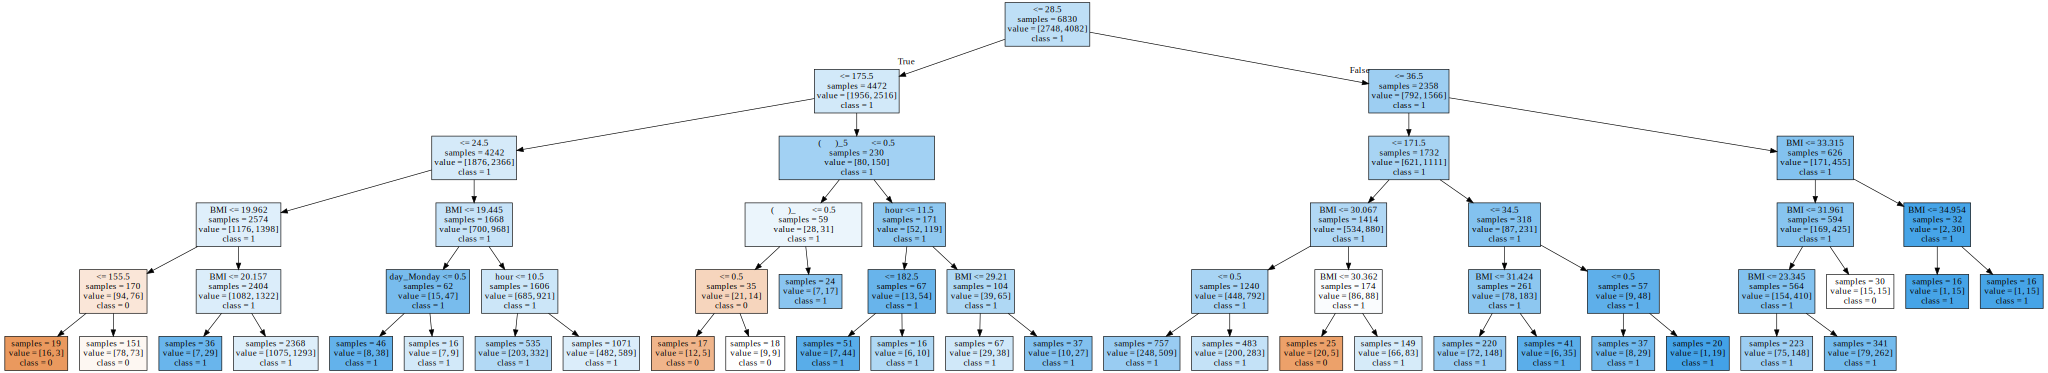

In [321]:
#트리모델 생성,criterion="gini",max_depth=2, min_samples_leaf=10으로 모델 생성
tree1 = DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=1234,
                         min_samples_leaf=16)
#tree model training
tree1.fit(sc_train_x,sc_train_y)
print("Accuracy: {0:.3f}".format(tree1.score(sc_test_x,sc_test_y)))
#트리모델을 tree.dot파일로 저장
export_graphviz(tree1,out_file="tree.dot", class_names=["0","1"],
              feature_names=sc_train_x.columns,impurity=False,filled=True)
#path 설정:graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고
os.environ["PATH"] += os.pathsep +""

#graphviz를 이용해 트리 모델 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [397]:
rf_uncustomized = RandomForestClassifier(random_state=123)
rf_uncustomized.fit(sc_train_x, sc_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(sc_train_x, sc_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(sc_test_x, sc_test_y)))
# randomforest 모형 생성

Accucary on training set: 0.932
Accucary on test set: 0.566


In [398]:

parameters = {               
              'criterion': ['entropy', 'gini'],
              'max_depth': list(i for i in range(1,4)), 
              'min_samples_leaf': list(i for i in range(10,50,4)),
              'n_estimators' : list(i for i in range(1,15))
             }

grid_obj = GridSearchCV(rf_uncustomized, parameters)
grid_obj

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [1, 2, 3], 'min_samples_leaf': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [399]:
grid_obj= grid_obj.fit(sc_train_x, sc_train_y)
searchcv = grid_obj.best_estimator_
searchcv.fit(sc_train_x, sc_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [396]:
predictions = searchcv.predict(sc_test_x)
print("Accuracy on test set:", accuracy_score(sc_test_y, predictions).round(3))

Accuracy on test set: 0.599


In [275]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = sc_train_x.columns
ds_feature_importance["Importance"] = searchcv.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance.sort_values("Importance", ascending=False).head(9)

,Feature,Importance
0,연령,0.397066
1,BMI,0.201494
14,일주일운동횟수(설문)_미입력,0.070745
3,성별,0.065317
15,일주일운동횟수(설문)_안함,0.036954
16,건강보조식품복용여부(설문)_무응답,0.035698
24,채널_naver,0.032335
4,hour,0.027691
7,음주여부(설문)_마시지않음,0.022315


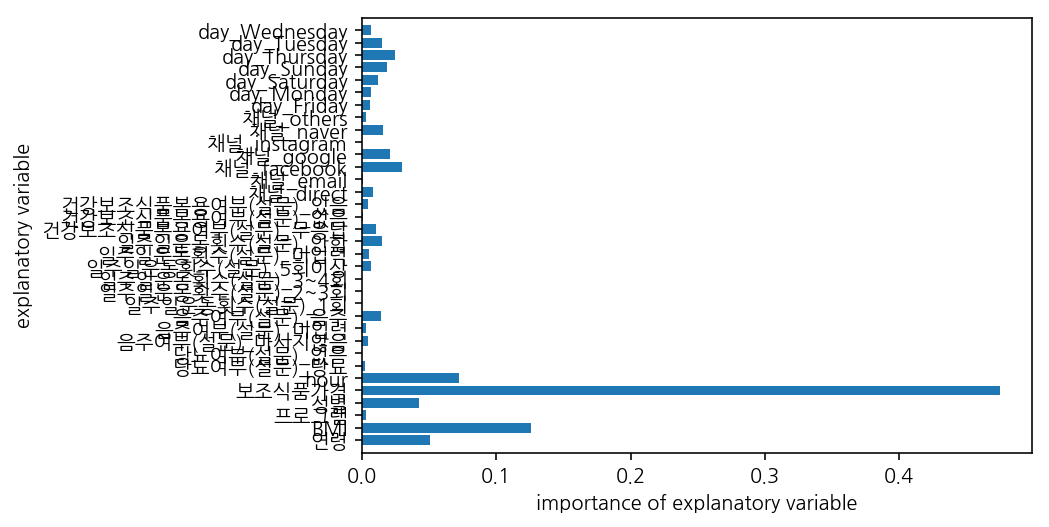

In [268]:

rf_model = RandomForestClassifier(criterion = "gini", max_depth= 4, min_samples_leaf = 19, \
                                  n_estimators = 10, random_state= 1234)
rf_model.fit(sc_train_x, sc_train_y)

feature_importance = pd.DataFrame()
feature_importance["feature"] = sc_train_x.columns
feature_importance["importance"] = rf_model.feature_importances_
feature_importance.sort_values( by = "importance" , ascending = False)

# 설명변수 중요도 그래프 함수 정의
def plot_feature_importance(model):
    n_features = sc_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_ , align= "center")
    plt.yticks(np.arange(n_features), sc_train_x.columns)
    plt.xlabel("importance of explanatory variable")
    plt.ylabel("explanatory variable")
    plt.ylim(-1, n_features)
    
plot_feature_importance(rf_model)

In [192]:
finalModel = RandomForestClassifier(criterion = "gini", max_depth = 4, 
                                    n_estimators = 9 , min_samples_leaf = 22, random_state = 1234)

In [193]:
finalModel.fit(sc_train_x,sc_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=22, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [605]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_vip.shape[0],)<0.7
sc_train=ds[msk]
sc_test=ds[~msk]
print("train data size: {}".format(sc_train.shape))
print("test datasize: {}".format(sc_test.shape))

train data size: (523, 32)
test datasize: (240, 32)


In [548]:
sc_train=sm.add_constant(sc_train)
sc_train.head()

,const,회원코드,연령,신장,회원초기체중,최저체중,목표체중,당뇨여부,음주여부,운동횟수,...,보식추구,time,month,day,hour,결제,프로그램,나이대,days,dayday
0,1.0,Y9RY2VSI,25,172.0,66.9,65.8,55,없음,미입력,5회이상,...,구매안함,2017-04-14 19:03:29.976000,4,Friday,19,1,1,20대 후반,5,14
1,1.0,3GTN3S3B,26,176.0,70.0,NaN,65,없음,미입력,5회이상,...,구매안함,2017-05-23 20:53:54.368000,5,Tuesday,20,1,1,20대 후반,2,23
2,1.0,6B0IG276,23,171.0,98.0,NaN,91,없음,마시지않음,5회이상,...,식이요법보조제A,2017-08-23 23:39:21.840000,8,Wednesday,23,1,0,20대 초반,3,23
5,1.0,2GHCC4T1,26,157.0,67.8,66.4,63,없음,미입력,5회이상,...,구매안함,2017-08-24 08:24:43.256000,8,Thursday,8,0,0,20대 후반,4,24
6,1.0,ERJUS7LV,41,160.0,54.1,NaN,50,없음,미입력,5회이상,...,구매안함,2017-05-25 09:38:14.776000,5,Thursday,9,0,1,40대,4,25


In [558]:
log_model1=sm.Logit.from_formula("""결제 ~ + 연령 + 목표체중 + 성별 + 프로그램 + days + 1""", sc_train)
log_result1=log_model1.fit()
print(log_result1.summary())

Optimization terminated successfully.
         Current function value: 0.669922
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     결제   No. Observations:                 6823
Model:                          Logit   Df Residuals:                     6817
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                0.007560
Time:                        20:02:41   Log-Likelihood:                -4570.9
converged:                       True   LL-Null:                       -4605.7
                                        LLR p-value:                 1.217e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0896      0.231     -0.388      0.698      -0.543       0.364
연령             0.0292      0.

In [559]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [560]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [562]:
knn_uncustomized.fit(sc_train_x,sc_train_y)
y_pred=knn_uncustomized.predict(sc_test_x)
print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(sc_test_y.tolist()[:10]))
print("accuracy:{0:.3f}".format(knn_uncustomized.score(sc_test_x,sc_test_y)))

predict test set:[0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
test set label:[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
accuracy:0.563


In [563]:
max_n_neighbors=28
para_n_neighbors=[i+3 for i in range(max_n_neighbors)]
train_accuracy=[]
test_accuracy=[]

for n_neighbors in para_n_neighbors:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(sc_train_x, sc_train_y)
    train_accuracy.append(clf.score(sc_train_x,sc_train_y))
    test_accuracy.append(clf.score(sc_test_x,sc_test_y))
    
ds_neighbors=pd.DataFrame()
ds_neighbors["Neighbors"]=para_n_neighbors
ds_neighbors["TrainAccuracy"]=train_accuracy
ds_neighbors["TestAccuracy"]=test_accuracy
ds_neighbors

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.787994,0.559085
1,4,0.725037,0.522199
2,5,0.722401,0.562842
3,6,0.701757,0.542350
4,7,0.687994,0.554645
5,8,0.675695,0.534495
6,9,0.674085,0.555328
7,10,0.663250,0.544057
8,11,0.657980,0.556352
9,12,0.652562,0.541325


In [564]:
def score(classifier, X_train, y_train, X_test, y_test, train = True):
    labels = sorted(y_train.unique())
    if train == True:
        y_pred = classifier.predict(X_train)
        print("Training result:\n")
        print("Training Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_train, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, y_pred)))
        res = cross_val_score(classifier, X_train, y_train, cv = 10, n_jobs= -1, scoring ="accuracy")
        print("Training Average Accuracy:\t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation:\t{0:.4f}".format(res.std()))
    elif train == False:
        y_pred = classifier.predict(X_test)
        print("Test result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
        print("Confusion Matrix:\n")
        cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = labels),
                          columns=labels, index=labels)
        sns.set_context('talk')
        ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True, cmap='Blues')
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels[::-1])
        ax.set_ylabel('Prediction')
        ax.set_xlabel('Ground Truth')

##############################Training##############################
Training result:

Training Accuracy Score: 0.7880

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2748
           1       0.81      0.84      0.83      4082

   micro avg       0.79      0.79      0.79      6830
   macro avg       0.78      0.77      0.78      6830
weighted avg       0.79      0.79      0.79      6830


Confusion Matrix:
[[1940  808]
 [ 640 3442]]

Training Average Accuracy:	0.5617

Standard Deviation:	0.0222
################################Test################################
Test result:

Accuracy Score: 0.5591

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43      1175
           1       0.63      0.65      0.64      1753

   micro avg       0.56      0.56      0.56      2928
   macro avg       0.54      0.54      0.54      2928
weighted avg       

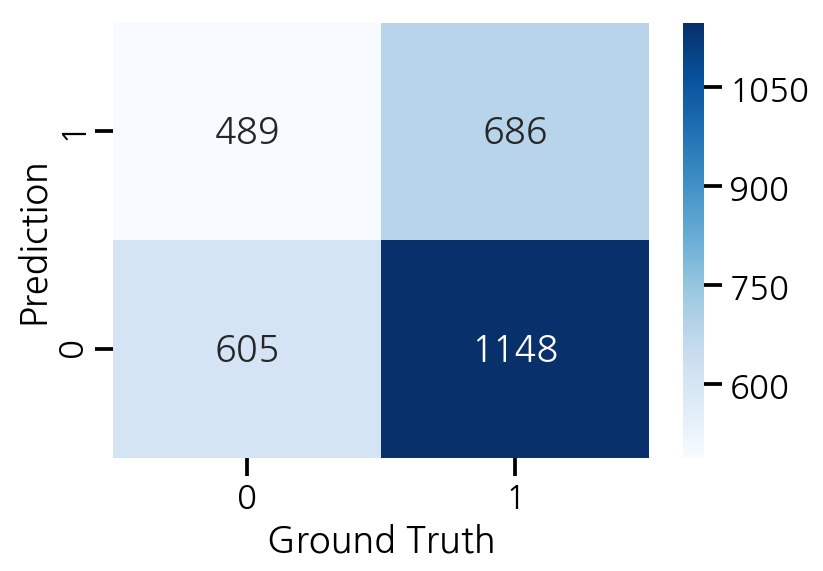

In [565]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(sc_train_x, sc_train_y)
print("##############################Training##############################")
score(knn ,sc_train_x,sc_train_y,sc_test_x,sc_test_y, train = True)
print("################################Test################################")
score(knn ,sc_train_x,sc_train_y,sc_test_x,sc_test_y, train = False)